# WIND ENERGY CONSUMPTION FORECASTING

## Loading All the required Libraries

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.layers import TimeDistributed, Flatten
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, Flatten
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.layers import TimeDistributed, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, TimeDistributed
from statsmodels.tsa.arima.model import ARIMA
from keras.layers import Input
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

## Read the Dataset

In [2]:
Wind_New = pd.read_excel('use_renew_sector.xlsx',sheet_name='Wind Energy', header=1, index_col=0)

In [3]:
# Reset column names to the first row (State/Year) and skip the last row (US)
Wind_New.columns = Wind_New.iloc[0]
Wind = Wind_New[1:-1]
print(Wind)

State  1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  ...  \
AK        0     0     0     0     0     0     0     0     0     0  ...   
AL        0     0     0     0     0     0     0     0     0     0  ...   
AR        0     0     0     0     0     0     0     0     0     0  ...   
AZ        0     0     0     0     0     0     0     0     0     0  ...   
CA        0     0     0     0     0     0     0     0     0     0  ...   
CO        0     0     0     0     0     0     0     0     0     0  ...   
CT        0     0     0     0     0     0     0     0     0     0  ...   
DC        0     0     0     0     0     0     0     0     0     0  ...   
DE        0     0     0     0     0     0     0     0     0     0  ...   
FL        0     0     0     0     0     0     0     0     0     0  ...   
GA        0     0     0     0     0     0     0     0     0     0  ...   
HI        0     0     0     0     0     0     0     0     0     0  ...   
IA        0     0     0     0     0   

## Load the state abbrevation and divide the years to 6 decades.

In [4]:
# state abbreviation dictionary
state_dict = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

# Select the columns for both time periods
Wind_1960_1970 = Wind.loc[:, '1960':'1970']
Wind_1970_1980 = Wind.loc[:, '1971':'1980']
Wind_1980_1990 = Wind.loc[:, '1981':'1990']
Wind_1990_2000 = Wind.loc[:, '1991':'2000']
Wind_2000_2010 = Wind.loc[:, '2001':'2010']
Wind_2010_2020 = Wind.loc[:, '2011':'2020']

# Calculate the average for each state over the specified years
average_1960_1970 = Wind_1960_1970.mean(axis=1)
average_1970_1980 = Wind_1970_1980.mean(axis=1)
average_1980_1990 = Wind_1980_1990.mean(axis=1)
average_1990_2000 = Wind_1990_2000.mean(axis=1)
average_2000_2010 = Wind_2000_2010.mean(axis=1)
average_2010_2020 = Wind_2010_2020.mean(axis=1)

## Print all states with its average for every 10 years

In [5]:
# Iterate through each time interval
time_intervals = [average_1960_1970, average_1970_1980, average_1980_1990, average_1990_2000, average_2000_2010, average_2010_2020]

for i, average_values in enumerate(time_intervals):
    states = []  # List to store full state names
    state_values = []  # List to store state values

    for state in average_values.index:
        # Check if the state abbreviation exists in the dictionary
        if state in state_dict:
            full_state_name = state_dict[state]
            state_value = average_values[state]
            states.append(full_state_name)
            state_values.append(state_value)

    print(f"\nStates from {1960 + i * 10} to {1970 + i * 10}:")
    for j, state in enumerate(states):
        # Round the state value to a specific number of decimal places 
        rounded_value = round(state_values[j], 2)
        print(f"State: {state} - Value: {rounded_value}")


States from 1960 to 1970:
State: Alaska - Value: 0.0
State: Alabama - Value: 0.0
State: Arkansas - Value: 0.0
State: Arizona - Value: 0.0
State: California - Value: 0.0
State: Colorado - Value: 0.0
State: Connecticut - Value: 0.0
State: District of Columbia - Value: 0.0
State: Delaware - Value: 0.0
State: Florida - Value: 0.0
State: Georgia - Value: 0.0
State: Hawaii - Value: 0.0
State: Iowa - Value: 0.0
State: Idaho - Value: 0.0
State: Illinois - Value: 0.0
State: Indiana - Value: 0.0
State: Kansas - Value: 0.0
State: Kentucky - Value: 0.0
State: Louisiana - Value: 0.0
State: Massachusetts - Value: 0.0
State: Maryland - Value: 0.0
State: Maine - Value: 0.0
State: Michigan - Value: 0.0
State: Minnesota - Value: 0.0
State: Missouri - Value: 0.0
State: Mississippi - Value: 0.0
State: Montana - Value: 0.0
State: North Carolina - Value: 0.0
State: North Dakota - Value: 0.0
State: Nebraska - Value: 0.0
State: New Hampshire - Value: 0.0
State: New Jersey - Value: 0.0
State: New Mexico - Val

## Average the state into 5 clusters

### Average for 1960 to 1970 and dividing it into 5 clusters

There was no consumption of Wind energy for these period.

### Average for 1970 to 1980 and dividing it into 5 clusters

There was no consumption of Wind energy for these period.

### Average for 1980 to 1990 and dividing it into 5 clusters

In [6]:
# Combine the average values for 1980-1990
average_values = pd.concat([average_1980_1990], axis=1)
average_values.columns = ['1980-1990']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1980-1990')

# Round off the values to 2 decimal places 
average_values['1980-1990'] = average_values['1980-1990'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1980-1990'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='1980-1990') 
    cluster_min = cluster_states['1980-1990'].min()
    cluster_max = cluster_states['1980-1990'].max()
    for state, value in zip(cluster_states.index, cluster_states['1980-1990']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Wind_1980-1990.csv', index=True)



States in Cluster 0:
State: AK - Value: 0.0
State: MI - Value: 0.0
State: CO - Value: 0.0
State: CT - Value: 0.0
State: DC - Value: 0.0
State: DE - Value: 0.0
State: FL - Value: 0.0
State: GA - Value: 0.0
State: AL - Value: 0.0
State: MS - Value: 0.0
State: IA - Value: 0.0
State: ID - Value: 0.0
State: IN - Value: 0.0
State: KY - Value: 0.0
State: LA - Value: 0.0
State: MA - Value: 0.0
State: MD - Value: 0.0
State: ME - Value: 0.0
State: IL - Value: 0.0
State: AR - Value: 0.0
State: MO - Value: 0.0
State: PA - Value: 0.0
State: WA - Value: 0.0
State: NC - Value: 0.0
State: ND - Value: 0.0
State: NE - Value: 0.0
State: NH - Value: 0.0
State: NJ - Value: 0.0
State: NM - Value: 0.0
State: NV - Value: 0.0
State: NY - Value: 0.0
State: OH - Value: 0.0
State: WV - Value: 0.0
State: OK - Value: 0.0
State: RI - Value: 0.0
State: SC - Value: 0.0
State: SD - Value: 0.0
State: TN - Value: 0.0
State: TX - Value: 0.0
State: UT - Value: 0.0
State: VA - Value: 0.0
State: VT - Value: 0.0
State: AZ - 

### Plot all the cluters into map using Tablaue

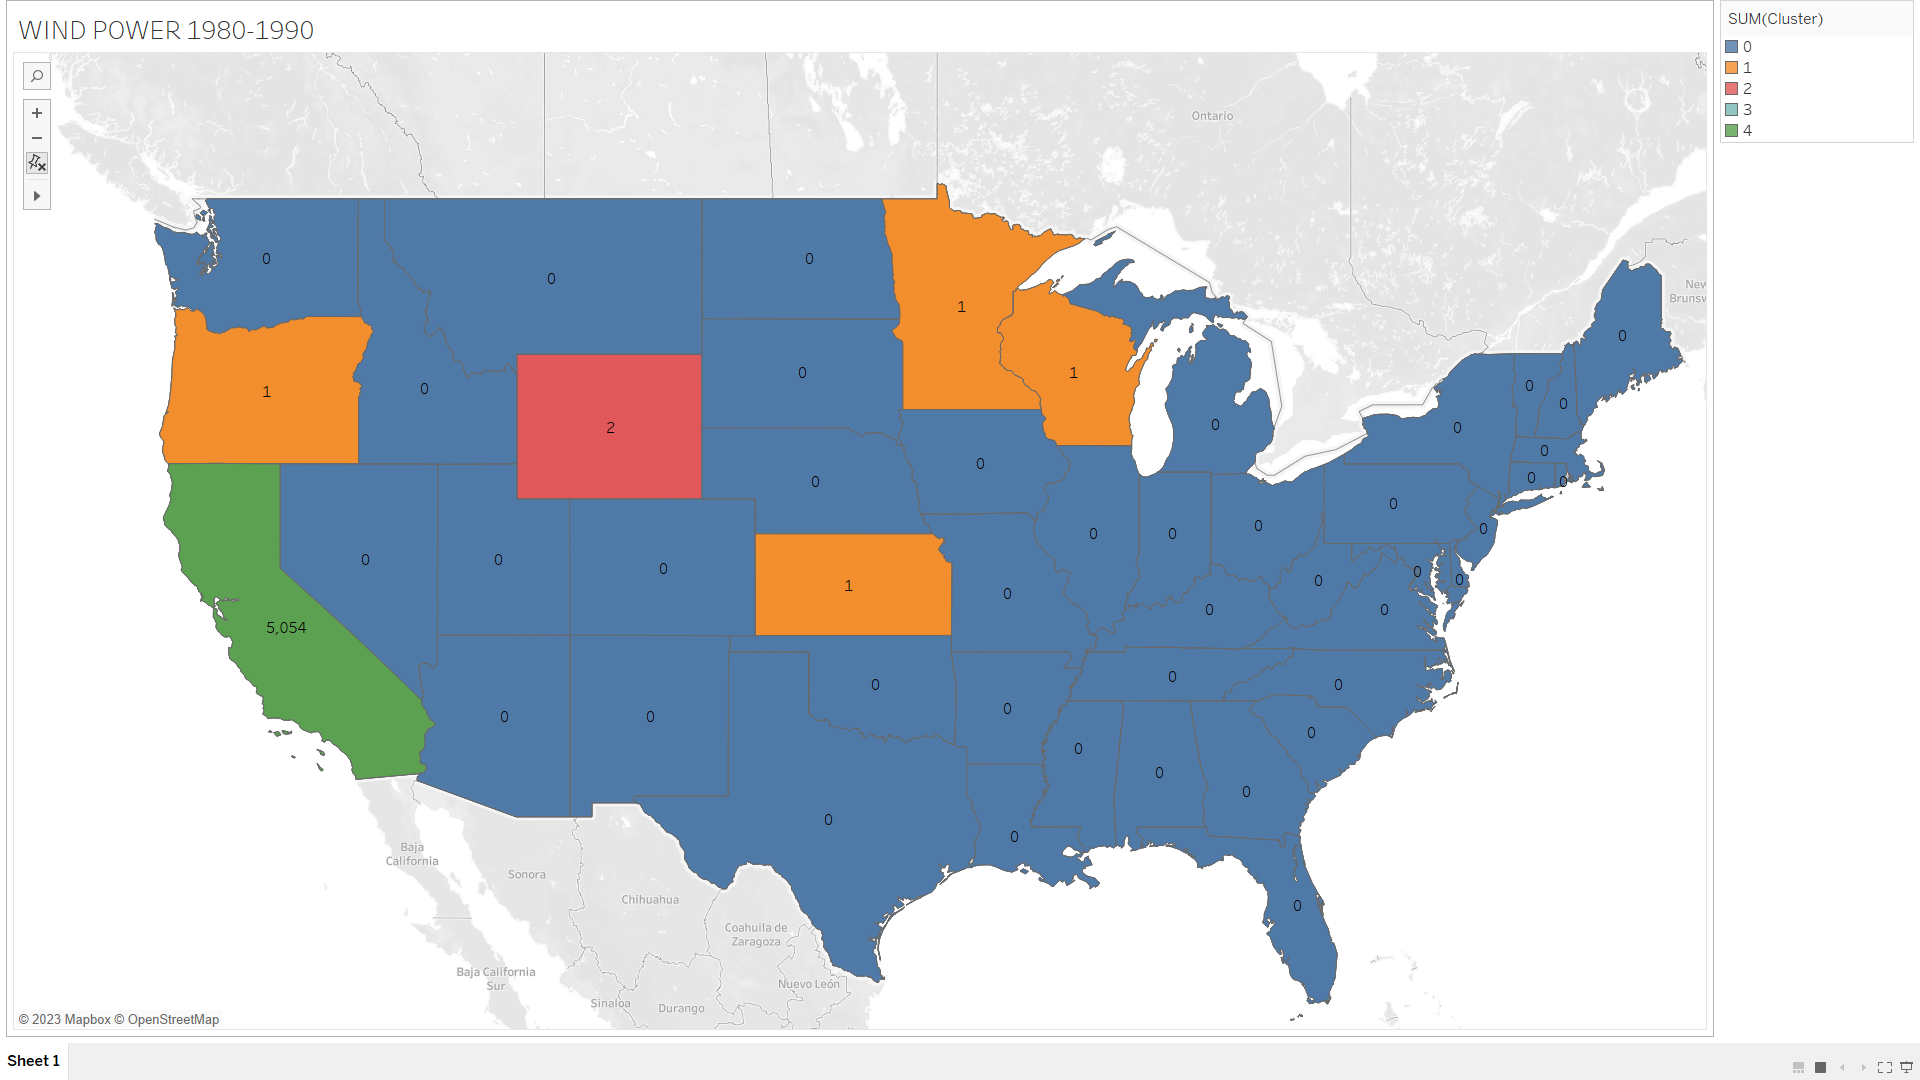

### Average for 1990 to 2000 an dividing it into 5 clusters

In [5]:
# Combine the average values for 1990-2000
average_values = pd.concat([average_1990_2000], axis=1)
average_values.columns = ['1990-2000']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1990-2000')

# Round off the values to 2 decimal places 
average_values['1990-2000'] = average_values['1990-2000'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1990-2000'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='1990-2000') 
    cluster_min = cluster_states['1990-2000'].min()
    cluster_max = cluster_states['1990-2000'].max()
    for state, value in zip(cluster_states.index, cluster_states['1990-2000']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Wind_1990-2000.csv', index=True)



States in Cluster 0:
State: AK - Value: 0.0
State: MA - Value: 0.0
State: AL - Value: 0.0
State: AR - Value: 0.0
State: AZ - Value: 0.0
State: CO - Value: 0.0
State: CT - Value: 0.0
State: DC - Value: 0.0
State: ME - Value: 0.0
State: MD - Value: 0.0
State: GA - Value: 0.0
State: DE - Value: 0.0
State: ID - Value: 0.0
State: IL - Value: 0.0
State: IN - Value: 0.0
State: KY - Value: 0.0
State: LA - Value: 0.0
State: FL - Value: 0.0
State: OH - Value: 0.0
State: MS - Value: 0.0
State: VA - Value: 0.0
State: MO - Value: 0.0
State: WV - Value: 0.0
State: NC - Value: 0.0
State: ND - Value: 0.0
State: NE - Value: 0.0
State: NH - Value: 0.0
State: WA - Value: 0.0
State: NM - Value: 0.0
State: NJ - Value: 0.0
State: NV - Value: 0.0
State: OK - Value: 0.0
State: RI - Value: 0.0
State: SC - Value: 0.0
State: SD - Value: 0.0
State: TN - Value: 0.0
State: UT - Value: 0.0
State: MI - Value: 0.0
State: MT - Value: 0.1
State: KS - Value: 0.3
State: WI - Value: 2.8
State: PA - Value: 10.0
State: NY -

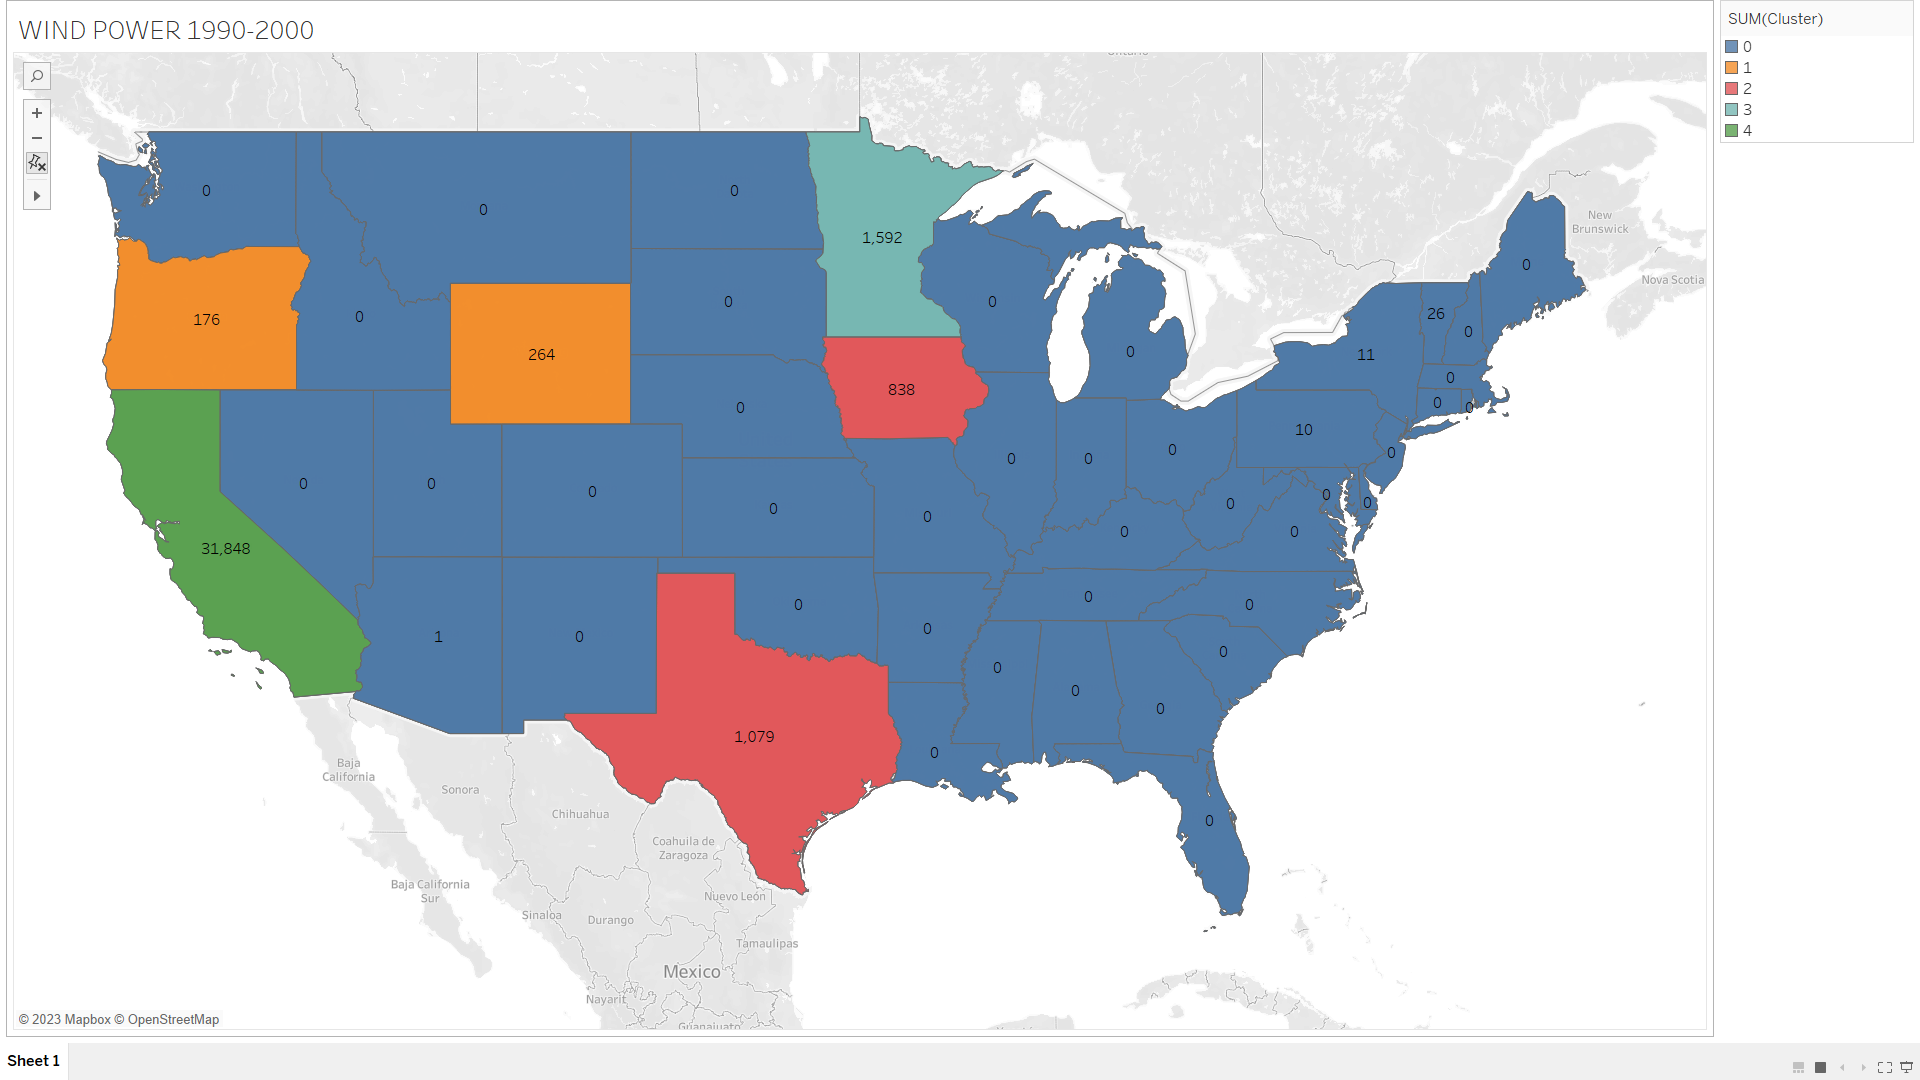

### Average for 2000 to 2010 and dividing it into 5 clusters

In [6]:
# Combine the average values for 2000-2010
average_values = pd.concat([average_2000_2010], axis=1)
average_values.columns = ['2000-2010']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='2000-2010')

# Round off the values to 2 decimal places 
average_values['2000-2010'] = average_values['2000-2010'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['2000-2010'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='2000-2010') 
    cluster_min = cluster_states['2000-2010'].min()
    cluster_max = cluster_states['2000-2010'].max()
    for state, value in zip(cluster_states.index, cluster_states['2000-2010']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Wind_2000-2010.csv', index=True)



States in Cluster 0:
State: MS - Value: 0.0
State: KY - Value: 0.0
State: LA - Value: 0.0
State: NC - Value: 0.0
State: NV - Value: 0.0
State: FL - Value: 0.0
State: GA - Value: 0.0
State: CT - Value: 0.0
State: SC - Value: 0.0
State: VA - Value: 0.0
State: AR - Value: 0.0
State: AL - Value: 0.0
State: DC - Value: 0.0
State: MD - Value: 1.5
State: DE - Value: 2.5
State: RI - Value: 3.0
State: AK - Value: 22.7
State: MA - Value: 30.9
State: OH - Value: 83.2
State: NJ - Value: 89.4
State: VT - Value: 113.0
State: NH - Value: 145.0
State: AZ - Value: 160.4
State: TN - Value: 258.3
State: UT - Value: 616.1
State: MI - Value: 795.5
State: ME - Value: 1006.1
State: HI - Value: 1070.5
State: ID - Value: 1278.8
State: MO - Value: 1590.6
State: NE - Value: 1654.1
State: SD - Value: 2556.1
State: WV - Value: 2861.4
State: WI - Value: 3193.9
State: MT - Value: 3215.6
State: IN - Value: 4466.9
State: PA - Value: 5173.6
Cluster 0 Range: 0.00 - 5173.60

States in Cluster 1:
State: NY - Value: 7816.

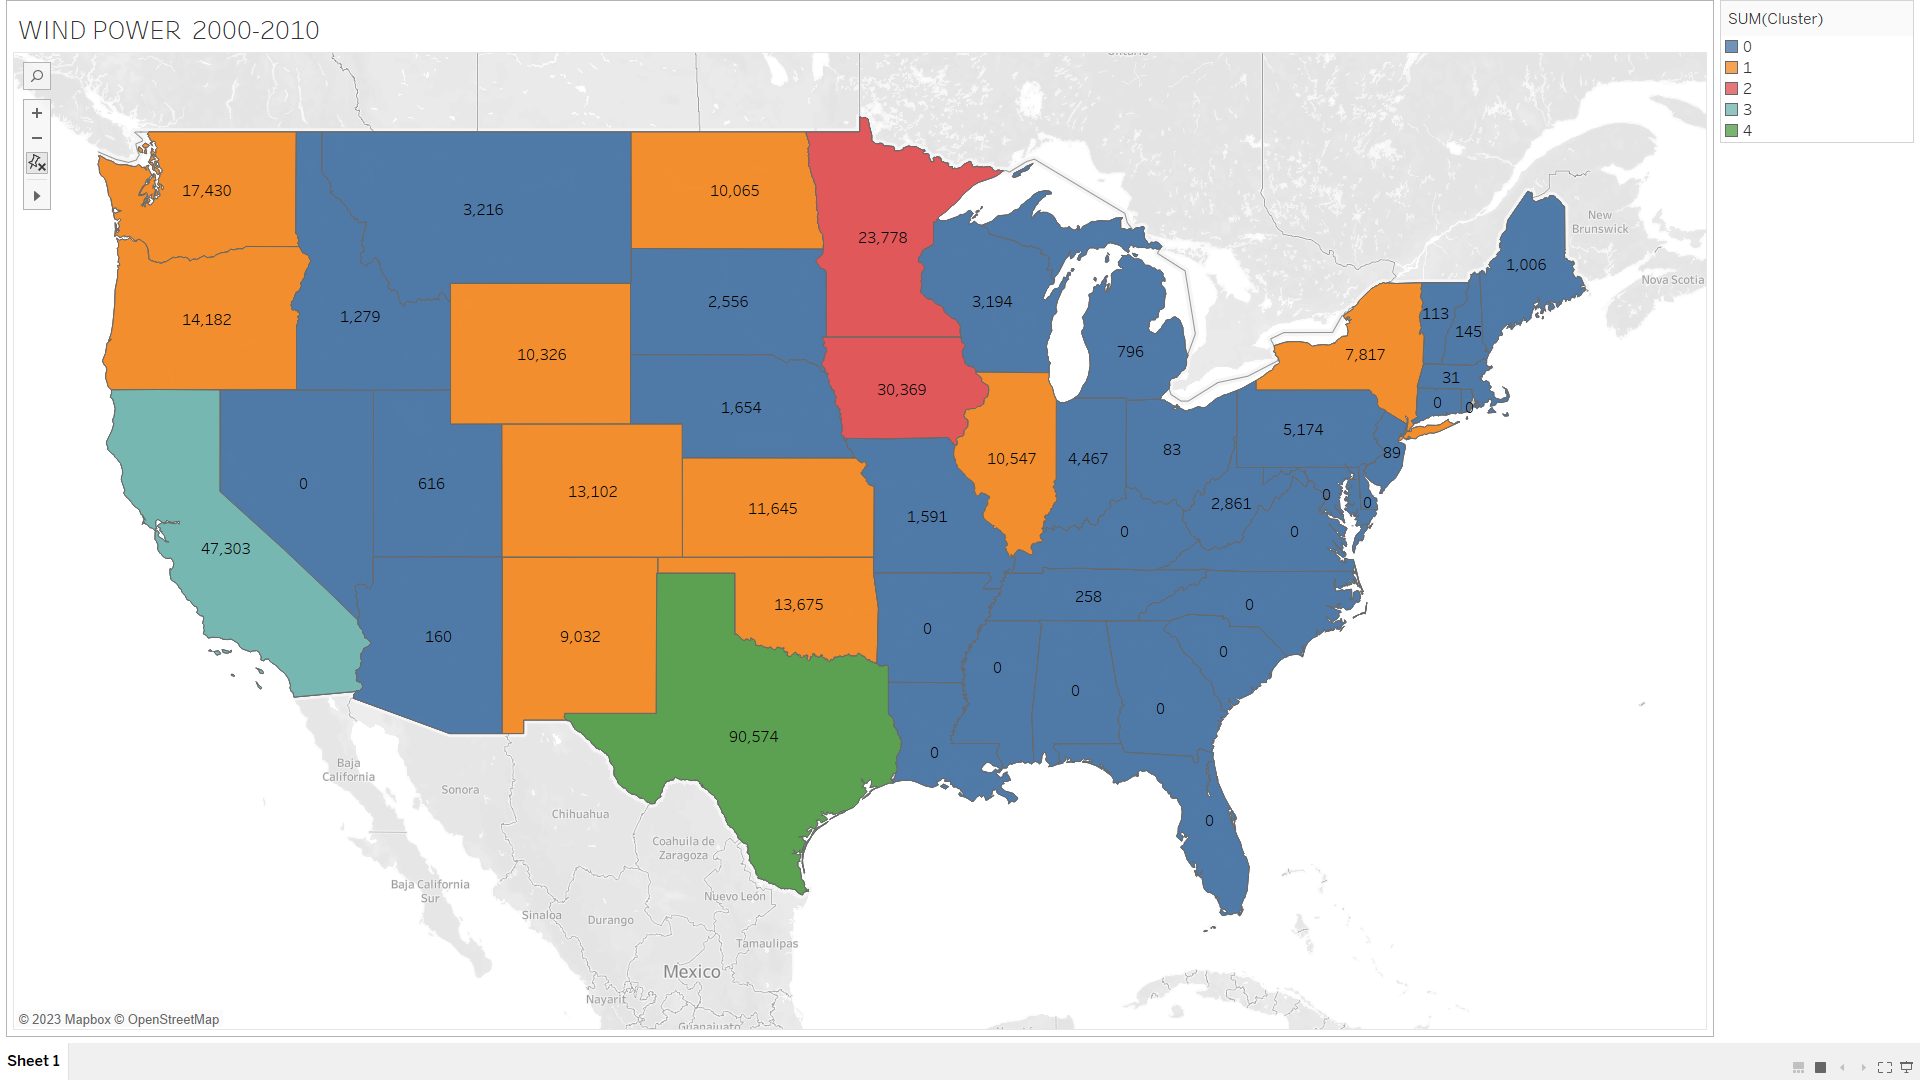

### Average for 2010 to 2020 and dividing it into 5 clusters

In [7]:
# Combine the average values for 2010-2020
average_values = pd.concat([average_2010_2020], axis=1)
average_values.columns = ['2010-2020']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='2010-2020')

# Round off the values to 2 decimal places 
average_values['2010-2020'] = average_values['2010-2020'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['2010-2020'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='2010-2020') 
    cluster_min = cluster_states['2010-2020'].min()
    cluster_max = cluster_states['2010-2020'].max()
    for state, value in zip(cluster_states.index, cluster_states['2010-2020']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Wind_2010-2020.csv', index=True)



States in Cluster 0:
State: MS - Value: 0.0
State: AL - Value: 0.0
State: AR - Value: 0.0
State: VA - Value: 0.0
State: SC - Value: 0.0
State: DC - Value: 0.0
State: FL - Value: 0.0
State: GA - Value: 0.0
State: LA - Value: 0.0
State: KY - Value: 0.0
State: DE - Value: 45.5
State: CT - Value: 56.3
State: NJ - Value: 171.0
State: TN - Value: 412.9
State: RI - Value: 703.1
State: AK - Value: 1146.8
State: MA - Value: 1765.3
State: NC - Value: 1877.5
State: NV - Value: 2447.6
State: VT - Value: 2519.9
State: NH - Value: 3413.7
State: MD - Value: 4051.8
State: AZ - Value: 4614.4
State: HI - Value: 4909.6
State: UT - Value: 6656.0
State: OH - Value: 12470.2
State: WV - Value: 13876.1
State: WI - Value: 14757.5
State: ME - Value: 14955.4
State: MO - Value: 16442.0
State: MT - Value: 18522.7
State: ID - Value: 22035.5
Cluster 0 Range: 0.00 - 22035.50

States in Cluster 1:
State: SD - Value: 28018.1
State: PA - Value: 29417.7
State: NY - Value: 35461.0
State: NM - Value: 35931.8
State: NE - V

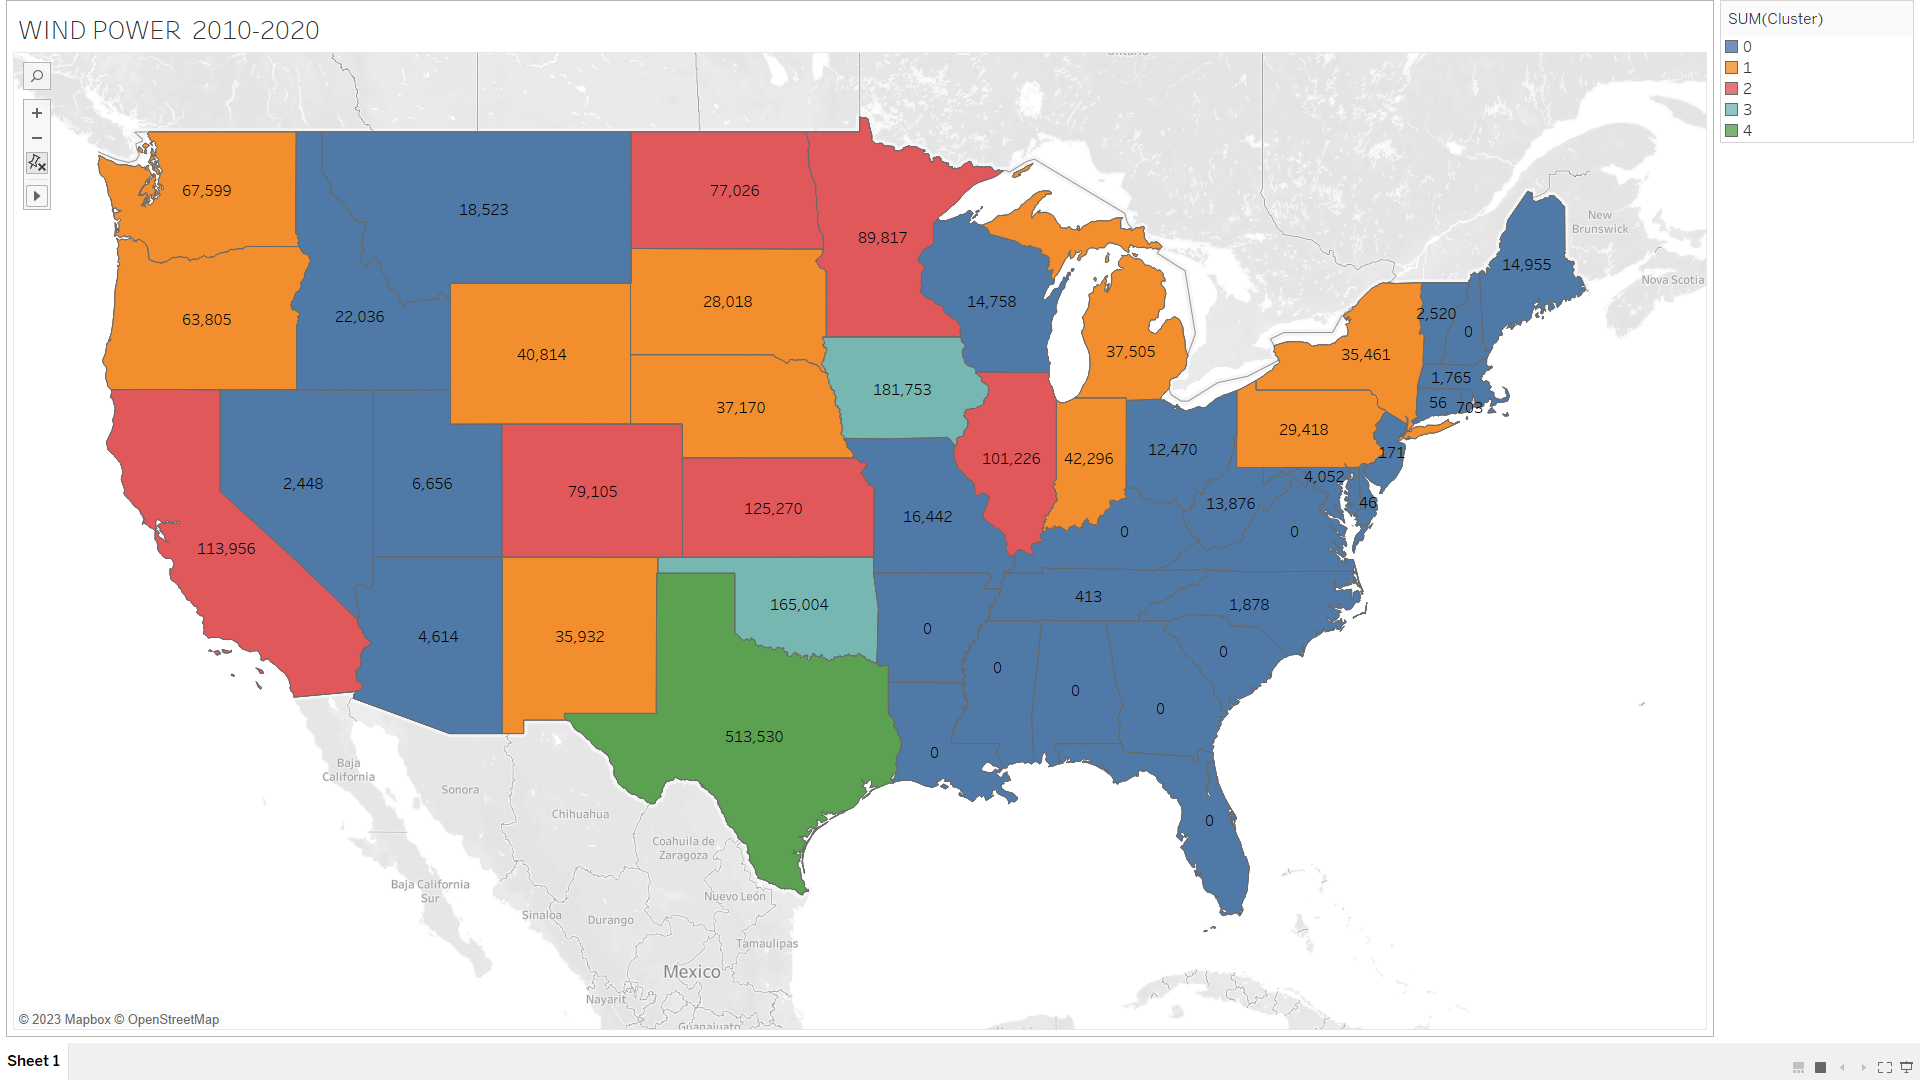

## Progression of the top 3 states 

### Progress of the states from 1980 to 1990

In [8]:
# Load the CSV file and read it
file_path = 'Wind_1980-1990.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information 
state_abbreviations = ['OK','IA','TX']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1980-1990 interval
print("Information for states in the 1980-1990 interval:")
print(state_info)


Information for states in the 1980-1990 interval:
    1980-1990  Cluster State Full Name
OK        0.0        0        Oklahoma
TX        0.0        0           Texas
IA        0.0        0            Iowa
CA     5053.6        4      California


### Progress of the states from 1990 to 2000

In [9]:
# Load the CSV file and read it
file_path = 'Wind_1990-2000.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information 
state_abbreviations = ['OK','IA','TX']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1970-1980 interval
print("Information for states in the 1990-2000 interval:")
print(state_info)


Information for states in the 1990-2000 interval:
    1990-2000  Cluster State Full Name
OK        0.0        0        Oklahoma
IA      837.9        2            Iowa
TX     1079.0        2           Texas
CA    31847.7        4      California


### Progress of the states from 2000 to 2010

In [10]:
# Load the CSV file and read it
file_path = 'Wind_2000-2010.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information 
state_abbreviations = ['OK','IA','TX']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 2000-2010 interval
print("Information for states in the 2000-2010 interval:")
print(state_info)


Information for states in the 2000-2010 interval:
    2000-2010  Cluster State Full Name
OK    13675.2        1        Oklahoma
IA    30368.5        2            Iowa
CA    47303.1        3      California
TX    90573.6        4           Texas


### Progress of the states from 2010 to 2020

In [11]:
# Load the CSV file and read it
file_path = 'Wind_2010-2020.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information 
state_abbreviations = ['OK','IA','TX']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1970-1980 interval
print("Information for states in the 2010-2020 interval:")
print(state_info)


Information for states in the 2010-2020 interval:
    2010-2020  Cluster State Full Name
CA   113956.1        2      California
OK   165004.2        3        Oklahoma
IA   181753.3        3            Iowa
TX   513529.5        4           Texas


### Plot the selected states

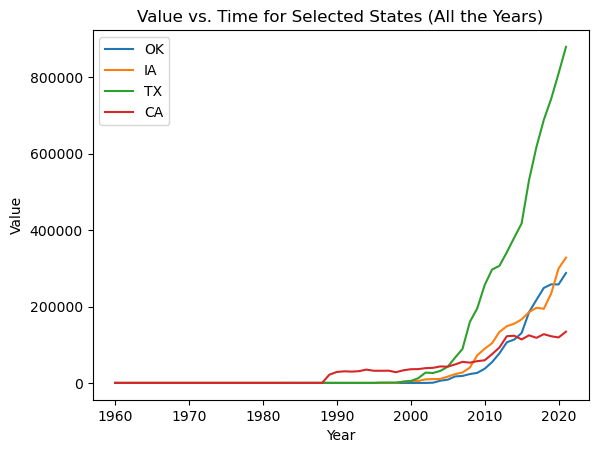

In [75]:
# Select only the 60 columns
Wind_60 = Wind.iloc[:, :62]
# Transpose the data to have years as rows and states as columns
Wind_T = Wind_60.transpose()

# list of state abbreviations to plot
state_abbreviations = ['OK','IA','TX','CA']

# Plot data for the selected states 
for state in state_abbreviations:
    plt.plot(Wind_T.index, Wind_T[state], label=state)

# Add x-labels 
plt.xlabel('Year')
# Add y-labels
plt.ylabel('Value')
# Add title
plt.title('Value vs. Time for Selected States (All the Years)')
# Add legend
plt.legend(loc='best')

# Show the plot
plt.show()

## Deep Learning Forecasting

### LSTM

In [19]:
#sequence length and accuracy threshold
sequence_length_lstm = 40
accuracy_threshold_lstm = 0.01  

# Loop through each selected state
state_mse_lstm = {}
state_rmse_lstm = {}
state_forecasts_lstm = {}
state_predictions_lstm = {} 

for state in ['OK','IA','TX']:
    # Extract the data for the selected state
    data = Wind.loc[state].values

    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))

    # Create sequences for LSTM
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_lstm):
        seq = scaled_data[i:i + sequence_length_lstm]
        target = scaled_data[i + sequence_length_lstm]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)

    # Include data beyond 1969 for training
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]

    # Create and train an LSTM model
    model_lstm = Sequential()
    model_lstm.add(LSTM(units=50, activation='relu', input_shape=(sequence_length_lstm, 1)))
    model_lstm.add(Dense(units=1))
    model_lstm.compile(optimizer='adam', loss='mean_squared_error')

    # Lists to store forecasts, actual values, and predictions
    forecasts_lstm = []
    actual_values_lstm = []
    predictions_lstm = []

    # Iterate through the forecast years
    current_sequence_lstm = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
        actual_value_lstm = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_lstm.reshape(1, sequence_length_lstm, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_lstm)
        mse_lstm = mean_squared_error([actual_value_lstm], [forecast_lstm[0]])
        model_lstm.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_lstm[0])

        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_lstm > accuracy_threshold_lstm:
            continue
        else:
            forecasts_lstm.append(forecast_lstm[0])
            actual_values_lstm.append(actual_value_lstm)

            # Store the prediction for the current year
            prediction_lstm = scaler.inverse_transform(forecast_lstm.reshape(-1, 1))[0][0]
            predictions_lstm.append(prediction_lstm)

    # Inverse transform the forecasts and actual values to the original scale
    forecasts_lstm = scaler.inverse_transform(np.array(forecasts_lstm).reshape(-1, 1))
    actual_values_lstm = scaler.inverse_transform(np.array(actual_values_lstm).reshape(-1, 1))

    # Calculate the mean squared error (MSE) for the forecasts
    mse_lstm = mean_squared_error(actual_values_lstm, forecasts_lstm)

    # Calculate the root mean squared error (RMSE)
    rmse_lstm = np.sqrt(mse_lstm)

    state_mse_lstm[state] = mse_lstm
    state_rmse_lstm[state] = rmse_lstm

    # Forecast for 2022 and 2023
    forecast_2022_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2022_lstm[0])
    forecast_2023_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_lstm = scaler.inverse_transform(forecast_2022_lstm.reshape(-1, 1))[0][0]
    forecast_2023_lstm = scaler.inverse_transform(forecast_2023_lstm.reshape(-1, 1))[0][0]
    state_forecasts_lstm[state] = {'2022': forecast_2022_lstm, '2023': forecast_2023_lstm}

    # Store predictions for 2019, 2020, and 2021
    forecast_2019_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2019_lstm[0])
    forecast_2020_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2020_lstm[0])
    forecast_2021_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2021_lstm[0])

    # Inverse transform the predictions to the original scale
    prediction_2019_lstm = scaler.inverse_transform(forecast_2019_lstm.reshape(-1, 1))[0][0]
    prediction_2020_lstm = scaler.inverse_transform(forecast_2020_lstm.reshape(-1, 1))[0][0]
    prediction_2021_lstm = scaler.inverse_transform(forecast_2021_lstm.reshape(-1, 1))[0][0]
    state_predictions_lstm[state] = {'2019': prediction_2019_lstm, '2020': prediction_2020_lstm, '2021': prediction_2021_lstm}

# Print MSE and RMSE for all states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_lstm.items():
    print(f"MSE for {state} (LSTM): {mse_value:.2f}")

print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_lstm.items():
    print(f"RMSE for {state} (LSTM): {rmse_value:.2f}")

# Print forecasts for all states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_lstm.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_lstm.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year
state_accuracies_lstm = {}

for state in state_predictions_lstm:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Wind.loc[state].loc[int(year)]
        predicted_value = state_predictions_lstm[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_lstm[state] = accuracies_state

# Print accuracies for each state and year
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States:")
for state, accuracies_state in state_accuracies_lstm.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 1s 713ms/step
Epoch 1/20
23/23 [==============================] - 5s 19ms/step - loss: 0.1642
Epoch 2/20
23/23 [==============================] - 0s 17ms/step - loss: 0.0857
Epoch 3/20
23/23 [==============================] - 0s 18ms/step - loss: 0.0776
Epoch 4/20
23/23 [==============================] - 0s 18ms/step - loss: 0.0739
Epoch 5/20
23/23 [==============================] - 0s 19ms/step - loss: 0.0684
Epoch 6/20
23/23 [==============================] - 0s 18ms/step - loss: 0.0642
Epoch 7/20
23/23 [==============================] - 0s 19ms/step - loss: 0.0580
Epoch 8/20
23/23 [==============================] - 0s 20ms/step - loss: 0.0596
Epoch 9/20
23/23 [==============================] - 0s 18ms/step - loss: 0.0586
Epoch 10/20
23/23 [==============================] - 0s 17ms/step - loss: 0.0585
Epoch 11/20
23/23 [==============================] - 0s 19ms/step - loss: 0.0609
Epoch 12/20
23/23 [==============================] - 0s 18ms/step

32/32 [==============================] - 1s 20ms/step - loss: 0.0179
Epoch 18/20
32/32 [==============================] - 1s 21ms/step - loss: 0.0177
Epoch 19/20
32/32 [==============================] - 1s 19ms/step - loss: 0.0191
Epoch 20/20
1/1 [==============================] - 0s 67ms/step
Epoch 1/20
33/33 [==============================] - 1s 21ms/step - loss: 0.0175
Epoch 2/20
33/33 [==============================] - 1s 19ms/step - loss: 0.0189
Epoch 3/20
33/33 [==============================] - 1s 20ms/step - loss: 0.0161
Epoch 4/20
33/33 [==============================] - 1s 21ms/step - loss: 0.0229
Epoch 5/20
33/33 [==============================] - 1s 20ms/step - loss: 0.0199
Epoch 6/20
33/33 [==============================] - 1s 21ms/step - loss: 0.0195
Epoch 7/20
33/33 [==============================] - 1s 20ms/step - loss: 0.0181
Epoch 8/20
33/33 [==============================] - 1s 21ms/step - loss: 0.0178
Epoch 9/20
33/33 [==============================] - 1s 19ms/step 

42/42 [==============================] - 1s 20ms/step - loss: 0.0152
Epoch 14/20
42/42 [==============================] - 1s 20ms/step - loss: 0.0146
Epoch 15/20
42/42 [==============================] - 1s 21ms/step - loss: 0.0151
Epoch 16/20
42/42 [==============================] - 1s 21ms/step - loss: 0.0147
Epoch 17/20
42/42 [==============================] - 1s 20ms/step - loss: 0.0135
Epoch 18/20
42/42 [==============================] - 1s 20ms/step - loss: 0.0132
Epoch 19/20
42/42 [==============================] - 1s 21ms/step - loss: 0.0139
Epoch 20/20
1/1 [==============================] - 0s 83ms/step
Epoch 1/20
43/43 [==============================] - 1s 19ms/step - loss: 0.0138
Epoch 2/20
43/43 [==============================] - 1s 18ms/step - loss: 0.0127
Epoch 3/20
43/43 [==============================] - 1s 18ms/step - loss: 0.0133
Epoch 4/20
43/43 [==============================] - 1s 17ms/step - loss: 0.0142
Epoch 5/20
43/43 [==============================] - 1s 16ms/s

52/52 [==============================] - 1s 16ms/step - loss: 0.0111
Epoch 10/20
52/52 [==============================] - 1s 16ms/step - loss: 0.0114
Epoch 11/20
52/52 [==============================] - 1s 17ms/step - loss: 0.0118
Epoch 12/20
52/52 [==============================] - 1s 16ms/step - loss: 0.0114
Epoch 13/20
52/52 [==============================] - 1s 17ms/step - loss: 0.0117
Epoch 14/20
52/52 [==============================] - 1s 17ms/step - loss: 0.0114
Epoch 15/20
52/52 [==============================] - 1s 16ms/step - loss: 0.0121
Epoch 16/20
52/52 [==============================] - 1s 16ms/step - loss: 0.0109
Epoch 17/20
52/52 [==============================] - 1s 19ms/step - loss: 0.0113
Epoch 18/20
52/52 [==============================] - 1s 20ms/step - loss: 0.0108
Epoch 19/20
52/52 [==============================] - 1s 20ms/step - loss: 0.0113
Epoch 20/20
1/1 [==============================] - 0s 72ms/step
Epoch 1/20
53/53 [==============================] - 1s 20

62/62 [==============================] - 1s 18ms/step - loss: 0.0148
Epoch 6/20
62/62 [==============================] - 1s 21ms/step - loss: 0.0146
Epoch 7/20
62/62 [==============================] - 1s 20ms/step - loss: 0.0148
Epoch 8/20
62/62 [==============================] - 1s 20ms/step - loss: 0.0135
Epoch 9/20
62/62 [==============================] - 1s 20ms/step - loss: 0.0131
Epoch 10/20
62/62 [==============================] - 1s 19ms/step - loss: 0.0142
Epoch 11/20
62/62 [==============================] - 1s 18ms/step - loss: 0.0135
Epoch 12/20
62/62 [==============================] - 1s 17ms/step - loss: 0.0129
Epoch 13/20
62/62 [==============================] - 1s 20ms/step - loss: 0.0137
Epoch 14/20
62/62 [==============================] - 1s 19ms/step - loss: 0.0132
Epoch 15/20
62/62 [==============================] - 1s 20ms/step - loss: 0.0140
Epoch 16/20
62/62 [==============================] - 1s 19ms/step - loss: 0.0138
Epoch 17/20
62/62 [=========================

1/1 [==============================] - 0s 73ms/step
Epoch 1/20
27/27 [==============================] - 1s 21ms/step - loss: 0.0328
Epoch 2/20
27/27 [==============================] - 1s 20ms/step - loss: 0.0344
Epoch 3/20
27/27 [==============================] - 1s 19ms/step - loss: 0.0299
Epoch 4/20
27/27 [==============================] - 1s 21ms/step - loss: 0.0313
Epoch 5/20
27/27 [==============================] - 1s 21ms/step - loss: 0.0290
Epoch 6/20
27/27 [==============================] - 1s 22ms/step - loss: 0.0309
Epoch 7/20
27/27 [==============================] - 1s 20ms/step - loss: 0.0333
Epoch 8/20
27/27 [==============================] - 1s 21ms/step - loss: 0.0301
Epoch 9/20
27/27 [==============================] - 1s 21ms/step - loss: 0.0297
Epoch 10/20
27/27 [==============================] - 1s 20ms/step - loss: 0.0282
Epoch 11/20
27/27 [==============================] - 1s 21ms/step - loss: 0.0293
Epoch 12/20
27/27 [==============================] - 1s 21ms/step 

36/36 [==============================] - 1s 20ms/step - loss: 0.0202
Epoch 18/20
36/36 [==============================] - 1s 20ms/step - loss: 0.0201
Epoch 19/20
36/36 [==============================] - 1s 20ms/step - loss: 0.0206
Epoch 20/20
1/1 [==============================] - 0s 83ms/step
Epoch 1/20
37/37 [==============================] - 1s 20ms/step - loss: 0.0191
Epoch 2/20
37/37 [==============================] - 1s 20ms/step - loss: 0.0179
Epoch 3/20
37/37 [==============================] - 1s 21ms/step - loss: 0.0178
Epoch 4/20
37/37 [==============================] - 1s 21ms/step - loss: 0.0178
Epoch 5/20
37/37 [==============================] - 1s 21ms/step - loss: 0.0198
Epoch 6/20
37/37 [==============================] - 1s 21ms/step - loss: 0.0179
Epoch 7/20
37/37 [==============================] - 1s 21ms/step - loss: 0.0183
Epoch 8/20
37/37 [==============================] - 1s 20ms/step - loss: 0.0184
Epoch 9/20
37/37 [==============================] - 1s 21ms/step 

46/46 [==============================] - 1s 20ms/step - loss: 0.0136
Epoch 14/20
46/46 [==============================] - 1s 21ms/step - loss: 0.0147
Epoch 15/20
46/46 [==============================] - 1s 22ms/step - loss: 0.0142
Epoch 16/20
46/46 [==============================] - 1s 18ms/step - loss: 0.0145
Epoch 17/20
46/46 [==============================] - 1s 21ms/step - loss: 0.0159
Epoch 18/20
46/46 [==============================] - 1s 25ms/step - loss: 0.0146
Epoch 19/20
46/46 [==============================] - 1s 19ms/step - loss: 0.0137
Epoch 20/20
1/1 [==============================] - 0s 63ms/step
Epoch 1/20
47/47 [==============================] - 1s 19ms/step - loss: 0.0137
Epoch 2/20
47/47 [==============================] - 1s 22ms/step - loss: 0.0135
Epoch 3/20
47/47 [==============================] - 1s 20ms/step - loss: 0.0144
Epoch 4/20
47/47 [==============================] - 1s 19ms/step - loss: 0.0143
Epoch 5/20
47/47 [==============================] - 1s 19ms/s

56/56 [==============================] - 1s 19ms/step - loss: 0.0111
Epoch 10/20
56/56 [==============================] - 1s 19ms/step - loss: 0.0116
Epoch 11/20
56/56 [==============================] - 1s 19ms/step - loss: 0.0113
Epoch 12/20
56/56 [==============================] - 1s 20ms/step - loss: 0.0111
Epoch 13/20
56/56 [==============================] - 1s 18ms/step - loss: 0.0110
Epoch 14/20
56/56 [==============================] - 1s 18ms/step - loss: 0.0116
Epoch 15/20
56/56 [==============================] - 1s 18ms/step - loss: 0.0110
Epoch 16/20
56/56 [==============================] - 1s 20ms/step - loss: 0.0110
Epoch 17/20
56/56 [==============================] - 1s 19ms/step - loss: 0.0110
Epoch 18/20
56/56 [==============================] - 1s 18ms/step - loss: 0.0109
Epoch 19/20
56/56 [==============================] - 1s 19ms/step - loss: 0.0108
Epoch 20/20
1/1 [==============================] - 0s 74ms/step
Epoch 1/20
57/57 [==============================] - 1s 17

26/26 [==============================] - 0s 10ms/step - loss: 0.0317
Epoch 4/20
26/26 [==============================] - 0s 9ms/step - loss: 0.0312
Epoch 5/20
26/26 [==============================] - 0s 9ms/step - loss: 0.0321
Epoch 6/20
26/26 [==============================] - 0s 9ms/step - loss: 0.0324
Epoch 7/20
26/26 [==============================] - 0s 9ms/step - loss: 0.0316
Epoch 8/20
26/26 [==============================] - 0s 9ms/step - loss: 0.0305
Epoch 9/20
26/26 [==============================] - 0s 9ms/step - loss: 0.0295
Epoch 10/20
26/26 [==============================] - 0s 9ms/step - loss: 0.0327
Epoch 11/20
26/26 [==============================] - 0s 8ms/step - loss: 0.0342
Epoch 12/20
26/26 [==============================] - 0s 9ms/step - loss: 0.0304
Epoch 13/20
26/26 [==============================] - 0s 8ms/step - loss: 0.0304
Epoch 14/20
26/26 [==============================] - 0s 9ms/step - loss: 0.0283
Epoch 15/20
26/26 [==============================] - 0s 8

36/36 [==============================] - 0s 9ms/step - loss: 0.0203
Epoch 2/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0186
Epoch 3/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0210
Epoch 4/20
36/36 [==============================] - 0s 8ms/step - loss: 0.0185
Epoch 5/20
36/36 [==============================] - 0s 8ms/step - loss: 0.0180
Epoch 6/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0178
Epoch 7/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0187
Epoch 8/20
36/36 [==============================] - 0s 8ms/step - loss: 0.0183
Epoch 9/20
36/36 [==============================] - 0s 8ms/step - loss: 0.0213
Epoch 10/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0172
Epoch 11/20
36/36 [==============================] - 0s 8ms/step - loss: 0.0179
Epoch 12/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0181
Epoch 13/20
36/36 [==============================] - 0s 8ms/

1/1 [==============================] - 0s 22ms/step
Epoch 1/20
46/46 [==============================] - 0s 9ms/step - loss: 0.0128
Epoch 2/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0137
Epoch 3/20
46/46 [==============================] - 0s 9ms/step - loss: 0.0139
Epoch 4/20
46/46 [==============================] - 0s 9ms/step - loss: 0.0189
Epoch 5/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0151
Epoch 6/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0136
Epoch 7/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0130
Epoch 8/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0135
Epoch 9/20
46/46 [==============================] - 0s 9ms/step - loss: 0.0178
Epoch 10/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0130
Epoch 11/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0132
Epoch 12/20
46/46 [==============================] - 0s 8ms/step - loss: 0.01

55/55 [==============================] - 0s 9ms/step - loss: 0.0108
Epoch 19/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0103
Epoch 20/20
1/1 [==============================] - 0s 29ms/step
Epoch 1/20
56/56 [==============================] - 0s 8ms/step - loss: 0.0111
Epoch 2/20
56/56 [==============================] - 0s 8ms/step - loss: 0.0150
Epoch 3/20
56/56 [==============================] - 0s 8ms/step - loss: 0.0109
Epoch 4/20
56/56 [==============================] - 0s 8ms/step - loss: 0.0112
Epoch 5/20
56/56 [==============================] - 0s 8ms/step - loss: 0.0101
Epoch 6/20
56/56 [==============================] - 0s 8ms/step - loss: 0.0099
Epoch 7/20
56/56 [==============================] - 0s 8ms/step - loss: 0.0110
Epoch 8/20
56/56 [==============================] - 0s 8ms/step - loss: 0.0100
Epoch 9/20
56/56 [==============================] - 0s 8ms/step - loss: 0.0106
Epoch 10/20
56/56 [==============================] - 1s 9ms/step - loss: 0.01

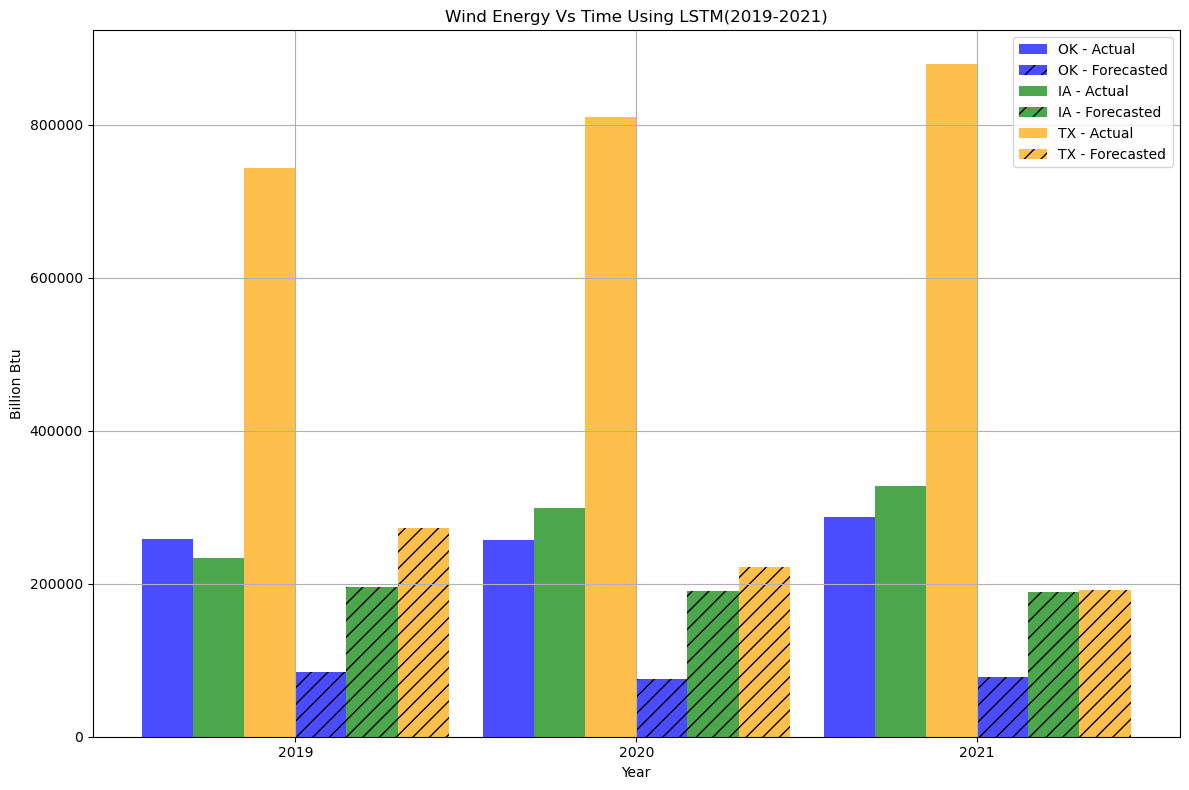

In [85]:
# Define the list of state abbreviations you want to plot
state_abbreviations =  ['OK','IA','TX']

# Use iloc to get the required years (2019 to 2021) from the end
selected_years = Wind_T.iloc[-3:]
years_forecast = selected_years

# Set the width of the bars
bar_width = 0.15 

# Define colors for each state
state_colors = {'OK': 'blue', 'IA': 'green', 'TX': 'orange'}

# Create the bar plot for the actual and forecasted values
plt.figure(figsize=(12, 8))

for i, state in enumerate(state_abbreviations):
    # Calculate the x positions for the bars, introducing an offset for each state
    x_positions_actual = np.arange(len(selected_years.index)) + i * bar_width
    x_positions_forecasted = np.arange(len(years_forecast)) + (len(state_abbreviations) + i) * bar_width

    # Use the color assigned to the state for both actual and forecasted bars
    plt.bar(x_positions_actual, selected_years[state], label=f"{state} - Actual", width=bar_width, color=state_colors[state], alpha=0.7)
    plt.bar(x_positions_forecasted, state_predictions_lstm[state].values(), bar_width,
            label=f"{state} - Forecasted", hatch='//', color=state_colors[state], alpha=0.7)

# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Wind Energy Vs Time Using LSTM(2019-2021)')

# Add legend
plt.legend()

# Set x-axis ticks and labels
combined_years = np.arange(len(selected_years.index)) + (len(state_abbreviations) - 0.5) * bar_width
plt.xticks(combined_years, selected_years.index)  

# Add grid
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()


### GRU

In [15]:
#sequence length and accuracy threshold
sequence_length_gru = 50
accuracy_threshold_gru = 0.01

# Loop through each selected state
state_mse_gru = {}
state_rmse_gru = {}
state_forecasts_gru = {}
state_predictions_gru = {}

for state in ['OK','IA','TX']:
    # Extract the data for the selected state
    data = Wind.loc[state].values
    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))
    # Create sequences for GRU
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_gru):
        seq = scaled_data[i:i + sequence_length_gru]
        target = scaled_data[i + sequence_length_gru]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)
    # training dataset for sequential learning
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]
    # Create and train a GRU model with additional layer and custom learning rate
    model_gru = Sequential()
    model_gru.add(GRU(units=50, activation='relu', input_shape=(sequence_length_gru, 1), return_sequences=True))
    model_gru.add(GRU(units=50, activation='relu'))  
    model_gru.add(Dense(units=1))
    custom_optimizer = Adam(learning_rate=0.001) 
    model_gru.compile(optimizer=custom_optimizer, loss='mean_squared_error')
    # Lists to store forecast
    forecasts_gru = []
    # Lists to store actual values
    actual_values_gru = []
    # Lists to store predictions
    predictions_gru = []
    # Iterate through the forecast years
    current_sequence_gru = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
        actual_value_gru = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_gru.reshape(1, sequence_length_gru, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_gru)
        mse_gru = mean_squared_error([actual_value_gru], [forecast_gru[0]])
        model_gru.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_gru = np.append(current_sequence_gru[1:], forecast_gru[0])
        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_gru > accuracy_threshold_gru:
            continue
        else:
            forecasts_gru.append(forecast_gru[0])
            actual_values_gru.append(actual_value_gru)
            # Store the prediction for the current year
            prediction_gru = scaler.inverse_transform(forecast_gru.reshape(-1, 1))[0][0]
            predictions_gru.append(prediction_gru)
    # Inverse transform the forecasts and actual values to the original scale
    forecasts_gru = scaler.inverse_transform(np.array(forecasts_gru).reshape(-1, 1))
    actual_values_gru = scaler.inverse_transform(np.array(actual_values_gru).reshape(-1, 1))
    # Calculate the MSE
    mse_gru = mean_squared_error(actual_values_gru, forecasts_gru)
    # Calculate the RMSE
    rmse_gru = np.sqrt(mse_gru)
    state_mse_gru[state] = mse_gru
    state_rmse_gru[state] = rmse_gru

    # Forecast for 2022 and 2023
    forecast_2022_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2022_gru[0])
    forecast_2023_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_gru = scaler.inverse_transform(forecast_2022_gru.reshape(-1, 1))[0][0]
    forecast_2023_gru = scaler.inverse_transform(forecast_2023_gru.reshape(-1, 1))[0][0]
    # Store predictions for 2022 and 2023
    state_forecasts_gru[state] = {'2022': forecast_2022_gru, '2023': forecast_2023_gru}

    # Forecast and Store predictions for 2019
    forecast_2019_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2019_gru[0])
    # Forecast and Store predictions for 2020
    forecast_2020_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2020_gru[0])
    # Forecast and Store predictions for 2021
    forecast_2021_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2021_gru[0])

    # Inverse transform the predictions for 2019
    prediction_2019_gru = scaler.inverse_transform(forecast_2019_gru.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2020
    prediction_2020_gru = scaler.inverse_transform(forecast_2020_gru.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2021
    prediction_2021_gru = scaler.inverse_transform(forecast_2021_gru.reshape(-1, 1))[0][0]
    state_predictions_gru[state] = {'2019': prediction_2019_gru, '2020': prediction_2020_gru, '2021': prediction_2021_gru}

# Print MSE for selected states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_gru.items():
    print(f"MSE for {state} (GRU): {mse_value:.2f}")

# Print RMSE for selected states
print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_gru.items():
    print(f"RMSE for {state} (GRU): {rmse_value:.2f}")

# Print forecasts for selected states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_gru.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_gru.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year for GRU
state_accuracies_gru = {}

for state in state_predictions_gru:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Wind.loc[state].loc[int(year)]
        predicted_value = state_predictions_gru[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_gru[state] = accuracies_state

# Print accuracies for each state and year for GRU
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States (GRU):")
for state, accuracies_state in state_accuracies_gru.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")


1/1 [==============================] - 0s 344ms/step
Epoch 1/20
23/23 [==============================] - 2s 10ms/step - loss: 0.1458
Epoch 2/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0866
Epoch 3/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0613
Epoch 4/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0541
Epoch 5/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0506
Epoch 6/20
23/23 [==============================] - 0s 13ms/step - loss: 0.0484
Epoch 7/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0490
Epoch 8/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0468
Epoch 9/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0489
Epoch 10/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0441
Epoch 11/20
23/23 [==============================] - 0s 11ms/step - loss: 0.0475
Epoch 12/20
23/23 [==============================] - 0s 10ms/step - los

1/1 [==============================] - 0s 31ms/step
Epoch 1/20
28/28 [==============================] - 0s 10ms/step - loss: 0.0265
Epoch 2/20
28/28 [==============================] - 0s 8ms/step - loss: 0.0218
Epoch 3/20
28/28 [==============================] - 0s 10ms/step - loss: 0.0236
Epoch 4/20
28/28 [==============================] - 0s 10ms/step - loss: 0.0242
Epoch 5/20
28/28 [==============================] - 0s 9ms/step - loss: 0.0255
Epoch 6/20
28/28 [==============================] - 0s 8ms/step - loss: 0.0271
Epoch 7/20
28/28 [==============================] - 0s 9ms/step - loss: 0.0245
Epoch 8/20
28/28 [==============================] - 0s 9ms/step - loss: 0.0221
Epoch 9/20
28/28 [==============================] - 0s 9ms/step - loss: 0.0227
Epoch 10/20
28/28 [==============================] - 0s 8ms/step - loss: 0.0223
Epoch 11/20
28/28 [==============================] - 0s 9ms/step - loss: 0.0232
Epoch 12/20
28/28 [==============================] - 0s 10ms/step - loss: 

37/37 [==============================] - 0s 9ms/step - loss: 0.0168
Epoch 19/20
37/37 [==============================] - 0s 9ms/step - loss: 0.0167
Epoch 20/20
1/1 [==============================] - 0s 52ms/step
Epoch 1/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0156
Epoch 2/20
38/38 [==============================] - 0s 10ms/step - loss: 0.0150
Epoch 3/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0162
Epoch 4/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0164
Epoch 5/20
38/38 [==============================] - 0s 10ms/step - loss: 0.0159
Epoch 6/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0159
Epoch 7/20
38/38 [==============================] - 0s 10ms/step - loss: 0.0165
Epoch 8/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0159
Epoch 9/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 10/20
38/38 [==============================] - 0s 9ms/step - loss: 0

47/47 [==============================] - 0s 9ms/step - loss: 0.0131
Epoch 17/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0130
Epoch 18/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0134
Epoch 19/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0127
Epoch 20/20
1/1 [==============================] - 0s 55ms/step
Epoch 1/20
48/48 [==============================] - 0s 10ms/step - loss: 0.0120
Epoch 2/20
48/48 [==============================] - 0s 10ms/step - loss: 0.0128
Epoch 3/20
48/48 [==============================] - 0s 9ms/step - loss: 0.0125
Epoch 4/20
48/48 [==============================] - 0s 9ms/step - loss: 0.0130
Epoch 5/20
48/48 [==============================] - 0s 9ms/step - loss: 0.0119
Epoch 6/20
48/48 [==============================] - 0s 9ms/step - loss: 0.0128
Epoch 7/20
48/48 [==============================] - 0s 9ms/step - loss: 0.0120
Epoch 8/20
48/48 [==============================] - 0s 10ms/step - loss: 

57/57 [==============================] - 1s 9ms/step - loss: 0.0105
Epoch 15/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0102
Epoch 16/20
57/57 [==============================] - 0s 9ms/step - loss: 0.0102
Epoch 17/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0114
Epoch 18/20
57/57 [==============================] - 0s 9ms/step - loss: 0.0106
Epoch 19/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0110
Epoch 20/20
1/1 [==============================] - 0s 29ms/step
Epoch 1/20
58/58 [==============================] - 1s 9ms/step - loss: 0.0098
Epoch 2/20
58/58 [==============================] - 1s 9ms/step - loss: 0.0095
Epoch 3/20
58/58 [==============================] - 1s 9ms/step - loss: 0.0095
Epoch 4/20
58/58 [==============================] - 1s 9ms/step - loss: 0.0095
Epoch 5/20
58/58 [==============================] - 1s 9ms/step - loss: 0.0103
Epoch 6/20
58/58 [==============================] - 1s 9ms/step - loss: 0

27/27 [==============================] - 0s 9ms/step - loss: 0.0258
Epoch 10/20
27/27 [==============================] - 0s 10ms/step - loss: 0.0252
Epoch 11/20
27/27 [==============================] - 0s 9ms/step - loss: 0.0252
Epoch 12/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0270
Epoch 13/20
27/27 [==============================] - 0s 9ms/step - loss: 0.0268
Epoch 14/20
27/27 [==============================] - 0s 11ms/step - loss: 0.0256
Epoch 15/20
27/27 [==============================] - 0s 9ms/step - loss: 0.0258
Epoch 16/20
27/27 [==============================] - 0s 9ms/step - loss: 0.0267
Epoch 17/20
27/27 [==============================] - 0s 9ms/step - loss: 0.0263
Epoch 18/20
27/27 [==============================] - 0s 9ms/step - loss: 0.0253
Epoch 19/20
27/27 [==============================] - 0s 9ms/step - loss: 0.0259
Epoch 20/20
1/1 [==============================] - 0s 31ms/step
Epoch 1/20
28/28 [==============================] - 0s 9ms/step - 

37/37 [==============================] - 0s 9ms/step - loss: 0.0183
Epoch 8/20
37/37 [==============================] - 0s 9ms/step - loss: 0.0178
Epoch 9/20
37/37 [==============================] - 0s 9ms/step - loss: 0.0176
Epoch 10/20
37/37 [==============================] - 0s 9ms/step - loss: 0.0177
Epoch 11/20
37/37 [==============================] - 0s 9ms/step - loss: 0.0187
Epoch 12/20
37/37 [==============================] - 0s 9ms/step - loss: 0.0178
Epoch 13/20
37/37 [==============================] - 0s 8ms/step - loss: 0.0183
Epoch 14/20
37/37 [==============================] - 0s 8ms/step - loss: 0.0175
Epoch 15/20
37/37 [==============================] - 0s 9ms/step - loss: 0.0187
Epoch 16/20
37/37 [==============================] - 0s 9ms/step - loss: 0.0178
Epoch 17/20
37/37 [==============================] - 0s 9ms/step - loss: 0.0181
Epoch 18/20
37/37 [==============================] - 0s 10ms/step - loss: 0.0180
Epoch 19/20
37/37 [==============================] - 

47/47 [==============================] - 0s 9ms/step - loss: 0.0121
Epoch 6/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0134
Epoch 7/20
47/47 [==============================] - 0s 8ms/step - loss: 0.0134
Epoch 8/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0126
Epoch 9/20
47/47 [==============================] - 0s 8ms/step - loss: 0.0131
Epoch 10/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0135
Epoch 11/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0136
Epoch 12/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0131
Epoch 13/20
47/47 [==============================] - 0s 8ms/step - loss: 0.0130
Epoch 14/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0135
Epoch 15/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0131
Epoch 16/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0136
Epoch 17/20
47/47 [==============================] - 0s 

57/57 [==============================] - 0s 9ms/step - loss: 0.0114
Epoch 4/20
57/57 [==============================] - 0s 9ms/step - loss: 0.0112
Epoch 5/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0117
Epoch 6/20
57/57 [==============================] - 0s 8ms/step - loss: 0.0109
Epoch 7/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0125
Epoch 8/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0112
Epoch 9/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0105
Epoch 10/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0110
Epoch 11/20
57/57 [==============================] - 0s 8ms/step - loss: 0.0113
Epoch 12/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0106
Epoch 13/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0113
Epoch 14/20
57/57 [==============================] - 0s 9ms/step - loss: 0.0115
Epoch 15/20
57/57 [==============================] - 1s 9m

26/26 [==============================] - 0s 12ms/step - loss: 0.0309
Epoch 19/20
26/26 [==============================] - 0s 13ms/step - loss: 0.0317
Epoch 20/20
1/1 [==============================] - 0s 40ms/step
Epoch 1/20
27/27 [==============================] - 0s 12ms/step - loss: 0.0334
Epoch 2/20
27/27 [==============================] - 0s 12ms/step - loss: 0.0331
Epoch 3/20
27/27 [==============================] - 0s 12ms/step - loss: 0.0323
Epoch 4/20
27/27 [==============================] - 0s 11ms/step - loss: 0.0307
Epoch 5/20
27/27 [==============================] - 0s 12ms/step - loss: 0.0317
Epoch 6/20
27/27 [==============================] - 0s 11ms/step - loss: 0.0313
Epoch 7/20
27/27 [==============================] - 0s 11ms/step - loss: 0.0309
Epoch 8/20
27/27 [==============================] - 0s 10ms/step - loss: 0.0307
Epoch 9/20
27/27 [==============================] - 0s 9ms/step - loss: 0.0297
Epoch 10/20
27/27 [==============================] - 0s 9ms/step - 

36/36 [==============================] - 0s 9ms/step - loss: 0.0178
Epoch 17/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0222
Epoch 18/20
36/36 [==============================] - 0s 10ms/step - loss: 0.0214
Epoch 19/20
36/36 [==============================] - 0s 10ms/step - loss: 0.0182
Epoch 20/20
1/1 [==============================] - 0s 31ms/step
Epoch 1/20
37/37 [==============================] - 0s 10ms/step - loss: 0.0183
Epoch 2/20
37/37 [==============================] - 0s 9ms/step - loss: 0.0177
Epoch 3/20
37/37 [==============================] - 0s 9ms/step - loss: 0.0182
Epoch 4/20
37/37 [==============================] - 0s 9ms/step - loss: 0.0161
Epoch 5/20
37/37 [==============================] - 0s 10ms/step - loss: 0.0175
Epoch 6/20
37/37 [==============================] - 0s 9ms/step - loss: 0.0177
Epoch 7/20
37/37 [==============================] - 0s 9ms/step - loss: 0.0177
Epoch 8/20
37/37 [==============================] - 0s 10ms/step - loss

46/46 [==============================] - 0s 10ms/step - loss: 0.0125
Epoch 15/20
46/46 [==============================] - 0s 10ms/step - loss: 0.0136
Epoch 16/20
46/46 [==============================] - 0s 10ms/step - loss: 0.0132
Epoch 17/20
46/46 [==============================] - 0s 9ms/step - loss: 0.0130
Epoch 18/20
46/46 [==============================] - 0s 9ms/step - loss: 0.0129
Epoch 19/20
46/46 [==============================] - 0s 9ms/step - loss: 0.0133
Epoch 20/20
1/1 [==============================] - 0s 33ms/step
Epoch 1/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0125
Epoch 2/20
47/47 [==============================] - 0s 10ms/step - loss: 0.0123
Epoch 3/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0129
Epoch 4/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0131
Epoch 5/20
47/47 [==============================] - 0s 8ms/step - loss: 0.0135
Epoch 6/20
47/47 [==============================] - 0s 9ms/step - los

56/56 [==============================] - 1s 9ms/step - loss: 0.0105
Epoch 13/20
56/56 [==============================] - 1s 10ms/step - loss: 0.0099
Epoch 14/20
56/56 [==============================] - 1s 9ms/step - loss: 0.0115
Epoch 15/20
56/56 [==============================] - 0s 9ms/step - loss: 0.0114
Epoch 16/20
56/56 [==============================] - 1s 9ms/step - loss: 0.0105
Epoch 17/20
56/56 [==============================] - 1s 11ms/step - loss: 0.0118
Epoch 18/20
56/56 [==============================] - 1s 10ms/step - loss: 0.0123
Epoch 19/20
56/56 [==============================] - 1s 11ms/step - loss: 0.0125
Epoch 20/20
1/1 [==============================] - 0s 31ms/step
Epoch 1/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0108
Epoch 2/20
57/57 [==============================] - 0s 9ms/step - loss: 0.0107
Epoch 3/20
57/57 [==============================] - 0s 9ms/step - loss: 0.0103
Epoch 4/20
57/57 [==============================] - 1s 9ms/step - l

In [17]:
# Define the sequence length and other parameters
sequence_length_gru = 50
accuracy_threshold_gru = 0.01

# Loop through each selected state
state_mse_gru = {}
state_rmse_gru = {}
state_forecasts_gru = {}
state_predictions_gru = {}

for state in ['OK','IA','TX']:
    # Extract the data for the selected state
    data = Wind.loc[state].values
    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))
    # Create sequences for GRU
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_gru):
        seq = scaled_data[i:i + sequence_length_gru]
        target = scaled_data[i + sequence_length_gru]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)
    # training dataset for sequential learning
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]
    # Create and train a GRU model with additional layer and custom learning rate
    model_gru = Sequential()
    model_gru.add(GRU(units=50, activation='relu', input_shape=(sequence_length_gru, 1), return_sequences=True))
    model_gru.add(GRU(units=50, activation='relu'))  
    model_gru.add(Dense(units=1))
    custom_optimizer = Adam(learning_rate=0.001) 
    model_gru.compile(optimizer=custom_optimizer, loss='mean_squared_error')
    # Lists to store forecast
    forecasts_gru = []
    # Lists to store actual values
    actual_values_gru = []
    # Lists to store predictions
    predictions_gru = []
    # Iterate through the forecast years
    current_sequence_gru = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
        actual_value_gru = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_gru.reshape(1, sequence_length_gru, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_gru)
        mse_gru = mean_squared_error([actual_value_gru], [forecast_gru[0]])
        model_gru.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_gru = np.append(current_sequence_gru[1:], forecast_gru[0])
        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_gru > accuracy_threshold_gru:
            continue
        else:
            forecasts_gru.append(forecast_gru[0])
            actual_values_gru.append(actual_value_gru)
            # Store the prediction for the current year
            prediction_gru = scaler.inverse_transform(forecast_gru.reshape(-1, 1))[0][0]
            predictions_gru.append(prediction_gru)
    # Inverse transform the forecasts and actual values to the original scale
    forecasts_gru = scaler.inverse_transform(np.array(forecasts_gru).reshape(-1, 1))
    actual_values_gru = scaler.inverse_transform(np.array(actual_values_gru).reshape(-1, 1))
    # Calculate the MSE
    mse_gru = mean_squared_error(actual_values_gru, forecasts_gru)
    # Calculate the RMSE
    rmse_gru = np.sqrt(mse_gru)
    state_mse_gru[state] = mse_gru
    state_rmse_gru[state] = rmse_gru

    # Forecast for 2022 and 2023
    forecast_2022_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2022_gru[0])
    forecast_2023_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_gru = scaler.inverse_transform(forecast_2022_gru.reshape(-1, 1))[0][0]
    forecast_2023_gru = scaler.inverse_transform(forecast_2023_gru.reshape(-1, 1))[0][0]
    # Store predictions for 2022 and 2023
    state_forecasts_gru[state] = {'2022': forecast_2022_gru, '2023': forecast_2023_gru}

    # Forecast and Store predictions for 2019
    forecast_2019_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2019_gru[0])
    # Forecast and Store predictions for 2020
    forecast_2020_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2020_gru[0])
    # Forecast and Store predictions for 2021
    forecast_2021_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2021_gru[0])

    # Inverse transform the predictions for 2019
    prediction_2019_gru = scaler.inverse_transform(forecast_2019_gru.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2020
    prediction_2020_gru = scaler.inverse_transform(forecast_2020_gru.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2021
    prediction_2021_gru = scaler.inverse_transform(forecast_2021_gru.reshape(-1, 1))[0][0]
    state_predictions_gru[state] = {'2019': prediction_2019_gru, '2020': prediction_2020_gru, '2021': prediction_2021_gru}

# Print MSE for selected states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_gru.items():
    print(f"MSE for {state} (GRU): {mse_value:.2f}")

# Print RMSE for selected states
print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_gru.items():
    print(f"RMSE for {state} (GRU): {rmse_value:.2f}")

# Print forecasts for selected states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_gru.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_gru.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 
          2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year for GRU
state_accuracies_gru = {}

for state in state_predictions_gru:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Wind.loc[state].loc[int(year)]
        predicted_value = state_predictions_gru[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_gru[state] = accuracies_state

# Print accuracies for each state and year for GRU
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States (GRU):")
for state, accuracies_state in state_accuracies_gru.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")


1/1 [==============================] - 0s 444ms/step
Epoch 1/20
13/13 [==============================] - 4s 25ms/step - loss: 0.3186
Epoch 2/20
13/13 [==============================] - 0s 31ms/step - loss: 0.1672
Epoch 3/20
13/13 [==============================] - 0s 25ms/step - loss: 0.1108
Epoch 4/20
13/13 [==============================] - 0s 24ms/step - loss: 0.0782
Epoch 5/20
13/13 [==============================] - 0s 22ms/step - loss: 0.0801
Epoch 6/20
13/13 [==============================] - 0s 24ms/step - loss: 0.0806
Epoch 7/20
13/13 [==============================] - 0s 23ms/step - loss: 0.0832
Epoch 8/20
13/13 [==============================] - 0s 29ms/step - loss: 0.0773
Epoch 9/20
13/13 [==============================] - 0s 31ms/step - loss: 0.0745
Epoch 10/20
13/13 [==============================] - 0s 30ms/step - loss: 0.0754
Epoch 11/20
13/13 [==============================] - 0s 23ms/step - loss: 0.0871
Epoch 12/20
13/13 [==============================] - 0s 23ms/step

22/22 [==============================] - 1s 23ms/step - loss: 0.0259
Epoch 18/20
22/22 [==============================] - 0s 23ms/step - loss: 0.0281
Epoch 19/20
22/22 [==============================] - 1s 23ms/step - loss: 0.0274
Epoch 20/20
1/1 [==============================] - 0s 34ms/step
Epoch 1/20
23/23 [==============================] - 1s 22ms/step - loss: 0.0284
Epoch 2/20
23/23 [==============================] - 1s 23ms/step - loss: 0.0263
Epoch 3/20
23/23 [==============================] - 1s 22ms/step - loss: 0.0252
Epoch 4/20
23/23 [==============================] - 1s 22ms/step - loss: 0.0255
Epoch 5/20
23/23 [==============================] - 1s 23ms/step - loss: 0.0289
Epoch 6/20
23/23 [==============================] - 1s 22ms/step - loss: 0.0275
Epoch 7/20
23/23 [==============================] - 1s 22ms/step - loss: 0.0265
Epoch 8/20
23/23 [==============================] - 1s 23ms/step - loss: 0.0272
Epoch 9/20
23/23 [==============================] - 1s 23ms/step 

32/32 [==============================] - 1s 22ms/step - loss: 0.0206
Epoch 14/20
32/32 [==============================] - 1s 22ms/step - loss: 0.0188
Epoch 15/20
32/32 [==============================] - 1s 22ms/step - loss: 0.0210
Epoch 16/20
32/32 [==============================] - 1s 23ms/step - loss: 0.0209
Epoch 17/20
32/32 [==============================] - 1s 23ms/step - loss: 0.0186
Epoch 18/20
32/32 [==============================] - 1s 23ms/step - loss: 0.0191
Epoch 19/20
32/32 [==============================] - 1s 22ms/step - loss: 0.0205
Epoch 20/20
1/1 [==============================] - 0s 39ms/step
Epoch 1/20
33/33 [==============================] - 1s 24ms/step - loss: 0.0206
Epoch 2/20
33/33 [==============================] - 1s 23ms/step - loss: 0.0184
Epoch 3/20
33/33 [==============================] - 1s 23ms/step - loss: 0.0175
Epoch 4/20
33/33 [==============================] - 1s 22ms/step - loss: 0.0193
Epoch 5/20
33/33 [==============================] - 1s 22ms/s

42/42 [==============================] - 1s 24ms/step - loss: 0.0154
Epoch 10/20
42/42 [==============================] - 1s 22ms/step - loss: 0.0148
Epoch 11/20
42/42 [==============================] - 1s 23ms/step - loss: 0.0153
Epoch 12/20
42/42 [==============================] - 1s 24ms/step - loss: 0.0153
Epoch 13/20
42/42 [==============================] - 1s 23ms/step - loss: 0.0151
Epoch 14/20
42/42 [==============================] - 1s 25ms/step - loss: 0.0145
Epoch 15/20
42/42 [==============================] - 1s 26ms/step - loss: 0.0135
Epoch 16/20
42/42 [==============================] - 1s 24ms/step - loss: 0.0147
Epoch 17/20
42/42 [==============================] - 1s 25ms/step - loss: 0.0145
Epoch 18/20
42/42 [==============================] - 1s 24ms/step - loss: 0.0148
Epoch 19/20
42/42 [==============================] - 1s 24ms/step - loss: 0.0155
Epoch 20/20
1/1 [==============================] - 0s 38ms/step
Epoch 1/20
43/43 [==============================] - 1s 23

52/52 [==============================] - 1s 23ms/step - loss: 0.0124
Epoch 6/20
52/52 [==============================] - 1s 24ms/step - loss: 0.0124
Epoch 7/20
52/52 [==============================] - 1s 23ms/step - loss: 0.0125
Epoch 8/20
52/52 [==============================] - 1s 24ms/step - loss: 0.0128
Epoch 9/20
52/52 [==============================] - 1s 24ms/step - loss: 0.0111
Epoch 10/20
52/52 [==============================] - 1s 24ms/step - loss: 0.0120
Epoch 11/20
52/52 [==============================] - 1s 27ms/step - loss: 0.0116
Epoch 12/20
52/52 [==============================] - 1s 23ms/step - loss: 0.0117
Epoch 13/20
52/52 [==============================] - 1s 23ms/step - loss: 0.0129
Epoch 14/20
52/52 [==============================] - 1s 23ms/step - loss: 0.0115
Epoch 15/20
52/52 [==============================] - 1s 22ms/step - loss: 0.0124
Epoch 16/20
52/52 [==============================] - 1s 24ms/step - loss: 0.0129
Epoch 17/20
52/52 [=========================

62/62 [==============================] - 2s 25ms/step - loss: 0.0156
Epoch 2/20
62/62 [==============================] - 2s 24ms/step - loss: 0.0144
Epoch 3/20
62/62 [==============================] - 1s 23ms/step - loss: 0.0149
Epoch 4/20
62/62 [==============================] - 1s 23ms/step - loss: 0.0132
Epoch 5/20
62/62 [==============================] - 2s 25ms/step - loss: 0.0128
Epoch 6/20
62/62 [==============================] - 1s 24ms/step - loss: 0.0135
Epoch 7/20
62/62 [==============================] - 2s 25ms/step - loss: 0.0128
Epoch 8/20
62/62 [==============================] - 1s 23ms/step - loss: 0.0128
Epoch 9/20
62/62 [==============================] - 1s 22ms/step - loss: 0.0127
Epoch 10/20
62/62 [==============================] - 2s 25ms/step - loss: 0.0133
Epoch 11/20
62/62 [==============================] - 1s 24ms/step - loss: 0.0130
Epoch 12/20
62/62 [==============================] - 1s 24ms/step - loss: 0.0137
Epoch 13/20
62/62 [=============================

16/16 [==============================] - 0s 27ms/step - loss: 0.0441
Epoch 18/20
16/16 [==============================] - 0s 24ms/step - loss: 0.0419
Epoch 19/20
16/16 [==============================] - 0s 25ms/step - loss: 0.0460
Epoch 20/20
1/1 [==============================] - 0s 31ms/step
Epoch 1/20
17/17 [==============================] - 0s 23ms/step - loss: 0.0530
Epoch 2/20
17/17 [==============================] - 0s 24ms/step - loss: 0.0427
Epoch 3/20
17/17 [==============================] - 0s 24ms/step - loss: 0.0422
Epoch 4/20
17/17 [==============================] - 0s 24ms/step - loss: 0.0404
Epoch 5/20
17/17 [==============================] - 0s 23ms/step - loss: 0.0406
Epoch 6/20
17/17 [==============================] - 0s 23ms/step - loss: 0.0413
Epoch 7/20
17/17 [==============================] - 0s 23ms/step - loss: 0.0418
Epoch 8/20
17/17 [==============================] - 0s 24ms/step - loss: 0.0406
Epoch 9/20
17/17 [==============================] - 0s 27ms/step 

26/26 [==============================] - 1s 22ms/step - loss: 0.0254
Epoch 14/20
26/26 [==============================] - 1s 22ms/step - loss: 0.0250
Epoch 15/20
26/26 [==============================] - 1s 22ms/step - loss: 0.0245
Epoch 16/20
26/26 [==============================] - 1s 23ms/step - loss: 0.0256
Epoch 17/20
26/26 [==============================] - 1s 22ms/step - loss: 0.0253
Epoch 18/20
26/26 [==============================] - 1s 23ms/step - loss: 0.0254
Epoch 19/20
26/26 [==============================] - 1s 23ms/step - loss: 0.0264
Epoch 20/20
1/1 [==============================] - 0s 34ms/step
Epoch 1/20
27/27 [==============================] - 1s 23ms/step - loss: 0.0247
Epoch 2/20
27/27 [==============================] - 1s 24ms/step - loss: 0.0252
Epoch 3/20
27/27 [==============================] - 1s 23ms/step - loss: 0.0240
Epoch 4/20
27/27 [==============================] - 1s 22ms/step - loss: 0.0262
Epoch 5/20
27/27 [==============================] - 1s 24ms/s

36/36 [==============================] - 1s 23ms/step - loss: 0.0179
Epoch 10/20
36/36 [==============================] - 1s 38ms/step - loss: 0.0169
Epoch 11/20
36/36 [==============================] - 2s 43ms/step - loss: 0.0167
Epoch 12/20
36/36 [==============================] - 2s 43ms/step - loss: 0.0162
Epoch 13/20
36/36 [==============================] - 2s 50ms/step - loss: 0.0172
Epoch 14/20
36/36 [==============================] - 2s 47ms/step - loss: 0.0181
Epoch 15/20
36/36 [==============================] - 1s 38ms/step - loss: 0.0188
Epoch 16/20
36/36 [==============================] - 1s 21ms/step - loss: 0.0189
Epoch 17/20
36/36 [==============================] - 1s 21ms/step - loss: 0.0174
Epoch 18/20
36/36 [==============================] - 1s 21ms/step - loss: 0.0170
Epoch 19/20
36/36 [==============================] - 1s 21ms/step - loss: 0.0175
Epoch 20/20
1/1 [==============================] - 0s 26ms/step
Epoch 1/20
37/37 [==============================] - 1s 36

46/46 [==============================] - 2s 45ms/step - loss: 0.0122
Epoch 6/20
46/46 [==============================] - 2s 43ms/step - loss: 0.0140
Epoch 7/20
46/46 [==============================] - 2s 43ms/step - loss: 0.0126
Epoch 8/20
46/46 [==============================] - 2s 43ms/step - loss: 0.0134
Epoch 9/20
46/46 [==============================] - 2s 45ms/step - loss: 0.0139
Epoch 10/20
46/46 [==============================] - 2s 43ms/step - loss: 0.0131
Epoch 11/20
46/46 [==============================] - 2s 43ms/step - loss: 0.0141
Epoch 12/20
46/46 [==============================] - 2s 43ms/step - loss: 0.0132
Epoch 13/20
46/46 [==============================] - 2s 43ms/step - loss: 0.0136
Epoch 14/20
46/46 [==============================] - 2s 44ms/step - loss: 0.0135
Epoch 15/20
46/46 [==============================] - 2s 44ms/step - loss: 0.0141
Epoch 16/20
46/46 [==============================] - 2s 43ms/step - loss: 0.0142
Epoch 17/20
46/46 [=========================

56/56 [==============================] - 2s 44ms/step - loss: 0.0106
Epoch 2/20
56/56 [==============================] - 2s 42ms/step - loss: 0.0108
Epoch 3/20
56/56 [==============================] - 2s 43ms/step - loss: 0.0128
Epoch 4/20
56/56 [==============================] - 2s 44ms/step - loss: 0.0121
Epoch 5/20
56/56 [==============================] - 2s 43ms/step - loss: 0.0109
Epoch 6/20
56/56 [==============================] - 2s 43ms/step - loss: 0.0101
Epoch 7/20
56/56 [==============================] - 2s 44ms/step - loss: 0.0110
Epoch 8/20
56/56 [==============================] - 2s 43ms/step - loss: 0.0104
Epoch 9/20
56/56 [==============================] - 2s 42ms/step - loss: 0.0109
Epoch 10/20
56/56 [==============================] - 2s 43ms/step - loss: 0.0111
Epoch 11/20
56/56 [==============================] - 2s 44ms/step - loss: 0.0115
Epoch 12/20
56/56 [==============================] - 2s 43ms/step - loss: 0.0107
Epoch 13/20
56/56 [=============================

15/15 [==============================] - 1s 41ms/step - loss: 0.0507
Epoch 16/20
15/15 [==============================] - 1s 44ms/step - loss: 0.0475
Epoch 17/20
15/15 [==============================] - 1s 46ms/step - loss: 0.0593
Epoch 18/20
15/15 [==============================] - 1s 42ms/step - loss: 0.0468
Epoch 19/20
15/15 [==============================] - 1s 44ms/step - loss: 0.0495
Epoch 20/20
1/1 [==============================] - 0s 91ms/step
Epoch 1/20
16/16 [==============================] - 1s 43ms/step - loss: 0.0444
Epoch 2/20
16/16 [==============================] - 1s 45ms/step - loss: 0.0447
Epoch 3/20
16/16 [==============================] - 1s 45ms/step - loss: 0.0463
Epoch 4/20
16/16 [==============================] - 1s 42ms/step - loss: 0.0435
Epoch 5/20
16/16 [==============================] - 1s 44ms/step - loss: 0.0456
Epoch 6/20
16/16 [==============================] - 1s 46ms/step - loss: 0.0446
Epoch 7/20
16/16 [==============================] - 1s 43ms/ste

25/25 [==============================] - 1s 43ms/step - loss: 0.0265
Epoch 12/20
25/25 [==============================] - 1s 44ms/step - loss: 0.0305
Epoch 13/20
25/25 [==============================] - 1s 44ms/step - loss: 0.0259
Epoch 14/20
25/25 [==============================] - 1s 44ms/step - loss: 0.0247
Epoch 15/20
25/25 [==============================] - 1s 45ms/step - loss: 0.0269
Epoch 16/20
25/25 [==============================] - 1s 43ms/step - loss: 0.0233
Epoch 17/20
25/25 [==============================] - 1s 43ms/step - loss: 0.0258
Epoch 18/20
25/25 [==============================] - 1s 44ms/step - loss: 0.0293
Epoch 19/20
25/25 [==============================] - 1s 44ms/step - loss: 0.0231
Epoch 20/20
1/1 [==============================] - 0s 84ms/step
Epoch 1/20
26/26 [==============================] - 1s 44ms/step - loss: 0.0233
Epoch 2/20
26/26 [==============================] - 1s 44ms/step - loss: 0.0279
Epoch 3/20
26/26 [==============================] - 1s 44ms

35/35 [==============================] - 2s 44ms/step - loss: 0.0181
Epoch 8/20
35/35 [==============================] - 1s 42ms/step - loss: 0.0165
Epoch 9/20
35/35 [==============================] - 2s 44ms/step - loss: 0.0194
Epoch 10/20
35/35 [==============================] - 2s 45ms/step - loss: 0.0169
Epoch 11/20
35/35 [==============================] - 1s 43ms/step - loss: 0.0181
Epoch 12/20
35/35 [==============================] - 2s 44ms/step - loss: 0.0180
Epoch 13/20
35/35 [==============================] - 2s 43ms/step - loss: 0.0179
Epoch 14/20
35/35 [==============================] - 2s 44ms/step - loss: 0.0169
Epoch 15/20
35/35 [==============================] - 2s 44ms/step - loss: 0.0191
Epoch 16/20
35/35 [==============================] - 2s 44ms/step - loss: 0.0182
Epoch 17/20
35/35 [==============================] - 2s 44ms/step - loss: 0.0225
Epoch 18/20
35/35 [==============================] - 2s 46ms/step - loss: 0.0207
Epoch 19/20
35/35 [=======================

45/45 [==============================] - 2s 43ms/step - loss: 0.0137
Epoch 4/20
45/45 [==============================] - 2s 44ms/step - loss: 0.0125
Epoch 5/20
45/45 [==============================] - 2s 43ms/step - loss: 0.0122
Epoch 6/20
45/45 [==============================] - 2s 43ms/step - loss: 0.0131
Epoch 7/20
45/45 [==============================] - 2s 45ms/step - loss: 0.0124
Epoch 8/20
45/45 [==============================] - 2s 42ms/step - loss: 0.0134
Epoch 9/20
45/45 [==============================] - 2s 45ms/step - loss: 0.0155
Epoch 10/20
45/45 [==============================] - 2s 43ms/step - loss: 0.0127
Epoch 11/20
45/45 [==============================] - 2s 45ms/step - loss: 0.0129
Epoch 12/20
45/45 [==============================] - 2s 47ms/step - loss: 0.0127
Epoch 13/20
45/45 [==============================] - 2s 45ms/step - loss: 0.0133
Epoch 14/20
45/45 [==============================] - 2s 48ms/step - loss: 0.0128
Epoch 15/20
45/45 [===========================

1/1 [==============================] - 0s 84ms/step
Epoch 1/20
55/55 [==============================] - 2s 44ms/step - loss: 0.0101
Epoch 2/20
55/55 [==============================] - 2s 44ms/step - loss: 0.0100
Epoch 3/20
55/55 [==============================] - 3s 46ms/step - loss: 0.0099
Epoch 4/20
55/55 [==============================] - 2s 45ms/step - loss: 0.0102
Epoch 5/20
55/55 [==============================] - 2s 45ms/step - loss: 0.0096
Epoch 6/20
55/55 [==============================] - 2s 45ms/step - loss: 0.0102
Epoch 7/20
55/55 [==============================] - 2s 45ms/step - loss: 0.0102
Epoch 8/20
55/55 [==============================] - 3s 45ms/step - loss: 0.0102
Epoch 9/20
55/55 [==============================] - 3s 46ms/step - loss: 0.0105
Epoch 10/20
55/55 [==============================] - 2s 45ms/step - loss: 0.0101
Epoch 11/20
55/55 [==============================] - 3s 47ms/step - loss: 0.0104
Epoch 12/20
55/55 [==============================] - 2s 45ms/step 

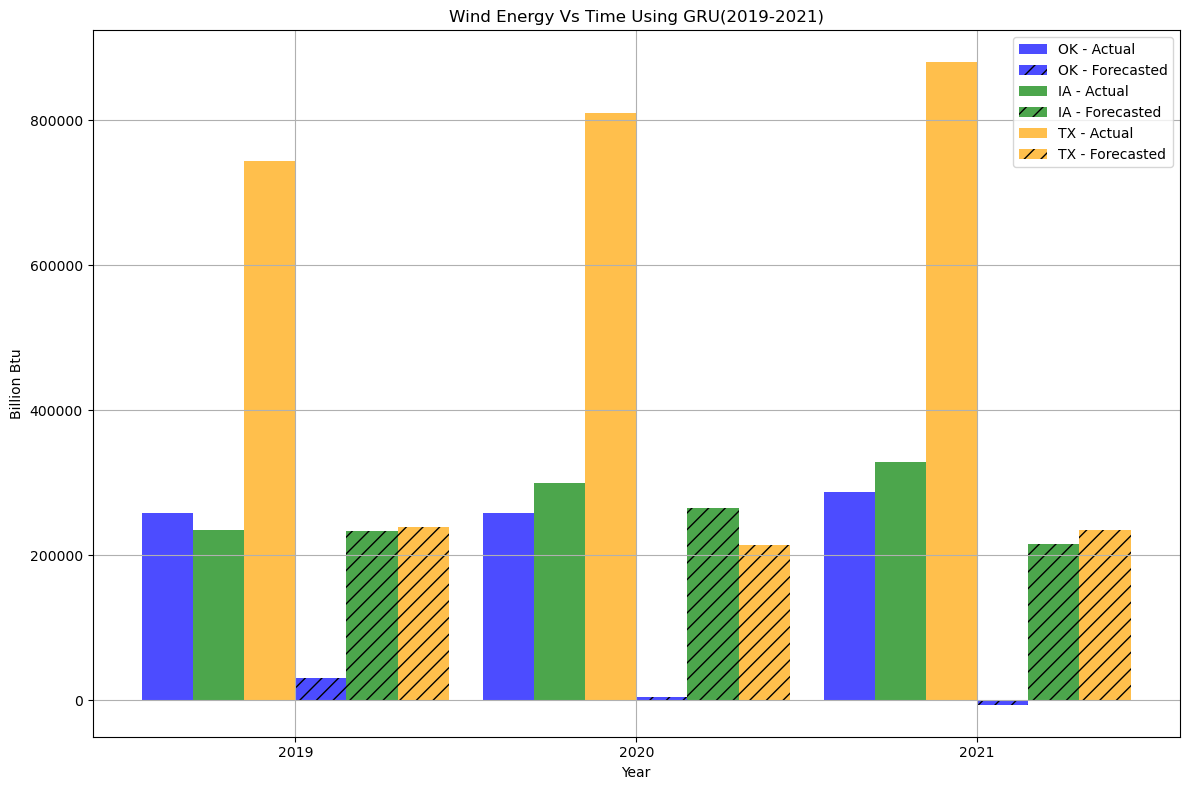

In [84]:
# Define the list of state abbreviations you want to plot
state_abbreviations =  ['OK','IA','TX']

# Use iloc to get the required years (2019 to 2021) from the end
selected_years = Wind_T.iloc[-3:]
years_forecast = selected_years

# Set the width of the bars
bar_width = 0.15 

# Define colors for each state
state_colors = {'OK': 'blue', 'IA': 'green', 'TX': 'orange'}

# Create the bar plot for the actual and forecasted values
plt.figure(figsize=(12, 8))

for i, state in enumerate(state_abbreviations):
    # Calculate the x positions for the bars, introducing an offset for each state
    x_positions_actual = np.arange(len(selected_years.index)) + i * bar_width
    x_positions_forecasted = np.arange(len(years_forecast)) + (len(state_abbreviations) + i) * bar_width

    # Use the color assigned to the state for both actual and forecasted bars
    plt.bar(x_positions_actual, selected_years[state], label=f"{state} - Actual", width=bar_width, color=state_colors[state], alpha=0.7)
    plt.bar(x_positions_forecasted, state_predictions_gru[state].values(), bar_width,
            label=f"{state} - Forecasted", hatch='//', color=state_colors[state], alpha=0.7)

# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Wind Energy Vs Time Using GRU(2019-2021)')

# Add legend
plt.legend()

# Set x-axis ticks and labels
combined_years = np.arange(len(selected_years.index)) + (len(state_abbreviations) - 0.5) * bar_width
plt.xticks(combined_years, selected_years.index)  

# Add grid
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()


In [8]:
# Loop through each selected state
state_mse_dict = {}
state_rmse_dict = {}
state_forecasts_dict = {}  

for state in ['OK','IA','TX','CA']:
    # Extract the data for the selected state
    data = Wind.loc[state].values

    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))

    # Create sequences for GRU
    sequence_length = 30
    sequences, targets = create_sequences(scaled_data, sequence_length)

    # Split data into training and testing sets
    train_size = int(len(sequences) * 0.8)
    x_train, y_train = sequences[:train_size], targets[:train_size]

    # Include data beyond 1969 for training
    x_train_full, y_train_full = sequences[:len(x_train)], targets[:len(y_train)]

    # Create and train a GRU model
    model = Sequential()
    model.add(GRU(128, input_shape=(sequence_length, 1), return_sequences=True))
    model.add(GRU(64, return_sequences=True))
    model.add(GRU(32))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error', sample_weight_mode="temporal")

    # Initialize sample weights with ones (equal weights for all samples)
    sample_weights = np.ones(train_size)

    # Lists to store forecasts and actual values
    forecasts = []
    actual_values = []

    # Lists to store MSE and RMSE values
    mse_values = []
    rmse_values = []

    # Iterate through the forecast years
    current_sequence = x_train_full[-1]  # Start with the last sequence from the training data
    for year in range(train_size, len(scaled_data)):
        # Make a prediction for the next year
        forecast = model.predict(current_sequence.reshape(1, sequence_length, 1))

        # Update the model with the actual data for the current year
        actual_value = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence.reshape(1, sequence_length, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value)

        # Calculate the mean squared error between the forecast and actual value
        mse = mean_squared_error([actual_value], [forecast[0]])

        # Calculate the root mean squared error between the forecast and actual value
        rmse = np.sqrt(mse)

        # Append MSE and RMSE values to lists
        mse_values.append(mse)
        rmse_values.append(rmse)

        # Update sample weights based on prediction accuracy
        sample_weights = np.append(sample_weights, mse)  # Use MSE for sample weights

        # Re-train the model with updated sample weights
        model.fit(x_train_full, y_train_full, epochs=10, batch_size=1, sample_weight=sample_weights)

        # Update the current sequence
        current_sequence = np.append(current_sequence[1:], forecast[0])

        # If prediction accuracy is below the threshold, retrain and predict again
        if mse > accuracy_threshold:
            continue
        else:
            forecasts.append(forecast[0])
            actual_values.append(actual_value)

    # Inverse transform the forecasts and actual values to the original scale
    forecasts = scaler.inverse_transform(np.array(forecasts).reshape(-1, 1))
    actual_values = scaler.inverse_transform(np.array(actual_values).reshape(-1, 1))

    # Calculate the mean squared error (MSE) for the forecasts
    average_mse = np.mean(mse_values)

    # Calculate the root mean squared error (RMSE) for the forecasts
    average_rmse = np.mean(rmse_values)

    state_mse_dict[state] = average_mse
    state_rmse_dict[state] = average_rmse

    # Forecast for 2022 and 2023
    forecast_2022 = model.predict(current_sequence.reshape(1, sequence_length, 1))
    current_sequence = np.append(current_sequence[1:], forecast_2022[0])
    forecast_2023 = model.predict(current_sequence.reshape(1, sequence_length, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022 = scaler.inverse_transform(forecast_2022.reshape(-1, 1))[0][0]
    forecast_2023 = scaler.inverse_transform(forecast_2023.reshape(-1, 1))[0][0]
    state_forecasts_dict[state] = {'2022': forecast_2022, '2023': forecast_2023}

# Print MSE and RMSE for all states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_dict.items():
    print(f"MSE for {state} (GRU): {mse_value:.2f}")

print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_dict.items():
    print(f"RMSE for {state} (GRU): {rmse_value:.2f}")

# Print forecasts for all states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_dict.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

1/1 [==============================] - 1s 1s/step
Epoch 1/10
26/26 [==============================] - 4s 18ms/step - loss: 0.0090
Epoch 2/10
26/26 [==============================] - 0s 18ms/step - loss: 0.0023
Epoch 3/10
26/26 [==============================] - 0s 17ms/step - loss: 0.0019
Epoch 4/10
26/26 [==============================] - 0s 18ms/step - loss: 0.0012
Epoch 5/10
26/26 [==============================] - 0s 18ms/step - loss: 0.0011
Epoch 6/10
26/26 [==============================] - 1s 20ms/step - loss: 6.4568e-04
Epoch 7/10
26/26 [==============================] - 1s 21ms/step - loss: 0.0011
Epoch 8/10
26/26 [==============================] - 0s 19ms/step - loss: 4.6625e-04
Epoch 9/10
26/26 [==============================] - 1s 21ms/step - loss: 0.0016
Epoch 10/10
1/1 [==============================] - 0s 19ms/step
Epoch 1/10
27/27 [==============================] - 1s 19ms/step - loss: 0.0051
Epoch 2/10
27/27 [==============================] - 0s 18ms/step - loss: 0.002

44/44 [==============================] - 1s 17ms/step - loss: 8.5492e-05
Epoch 7/10
44/44 [==============================] - 1s 17ms/step - loss: 8.9204e-05
Epoch 8/10
44/44 [==============================] - 1s 17ms/step - loss: 1.1717e-04
Epoch 9/10
44/44 [==============================] - 1s 17ms/step - loss: 1.4312e-04
Epoch 10/10
1/1 [==============================] - 0s 20ms/step
Epoch 1/10
45/45 [==============================] - 1s 17ms/step - loss: 4.7824e-04
Epoch 2/10
45/45 [==============================] - 1s 17ms/step - loss: 0.0018
Epoch 3/10
45/45 [==============================] - 1s 17ms/step - loss: 3.4962e-04
Epoch 4/10
45/45 [==============================] - 1s 19ms/step - loss: 1.9368e-04
Epoch 5/10
45/45 [==============================] - 1s 18ms/step - loss: 6.2824e-04
Epoch 6/10
45/45 [==============================] - 1s 18ms/step - loss: 5.5355e-04
Epoch 7/10
45/45 [==============================] - 1s 18ms/step - loss: 1.9992e-04
Epoch 8/10
45/45 [=========

53/53 [==============================] - 1s 18ms/step - loss: 1.4664e-04
Epoch 9/10
53/53 [==============================] - 1s 18ms/step - loss: 9.4918e-05
Epoch 10/10
1/1 [==============================] - 0s 43ms/step
Epoch 1/10
54/54 [==============================] - 1s 20ms/step - loss: 4.7299e-05
Epoch 2/10
54/54 [==============================] - 2s 30ms/step - loss: 9.4341e-05
Epoch 3/10
54/54 [==============================] - 1s 25ms/step - loss: 5.4142e-05
Epoch 4/10
54/54 [==============================] - 1s 21ms/step - loss: 5.8473e-05
Epoch 5/10
54/54 [==============================] - 1s 19ms/step - loss: 6.1344e-05
Epoch 6/10
54/54 [==============================] - 1s 19ms/step - loss: 6.9296e-05
Epoch 7/10
54/54 [==============================] - 1s 20ms/step - loss: 6.6904e-05
Epoch 8/10
54/54 [==============================] - 1s 19ms/step - loss: 4.7834e-05
Epoch 9/10
54/54 [==============================] - 1s 19ms/step - loss: 5.2976e-05
Epoch 10/10
1/1 [======

1/1 [==============================] - 1s 1s/step
Epoch 1/10
26/26 [==============================] - 6s 20ms/step - loss: 0.0140
Epoch 2/10
26/26 [==============================] - 1s 20ms/step - loss: 0.0055
Epoch 3/10
26/26 [==============================] - 0s 19ms/step - loss: 0.0042
Epoch 4/10
26/26 [==============================] - 0s 19ms/step - loss: 0.0027
Epoch 5/10
26/26 [==============================] - 0s 19ms/step - loss: 0.0044
Epoch 6/10
26/26 [==============================] - 0s 19ms/step - loss: 0.0028
Epoch 7/10
26/26 [==============================] - 0s 19ms/step - loss: 0.0024
Epoch 8/10
26/26 [==============================] - 0s 19ms/step - loss: 0.0020
Epoch 9/10
26/26 [==============================] - 0s 19ms/step - loss: 0.0022
Epoch 10/10
1/1 [==============================] - 0s 27ms/step
Epoch 1/10
27/27 [==============================] - 0s 18ms/step - loss: 0.0054
Epoch 2/10
27/27 [==============================] - 0s 18ms/step - loss: 0.0093
Epoch 

35/35 [==============================] - 1s 18ms/step - loss: 0.0016
Epoch 2/10
35/35 [==============================] - 1s 18ms/step - loss: 0.0026
Epoch 3/10
35/35 [==============================] - 1s 18ms/step - loss: 0.0027
Epoch 4/10
35/35 [==============================] - 1s 18ms/step - loss: 0.0012
Epoch 5/10
35/35 [==============================] - 1s 18ms/step - loss: 0.0011
Epoch 6/10
35/35 [==============================] - 1s 18ms/step - loss: 6.2799e-04
Epoch 7/10
35/35 [==============================] - 1s 18ms/step - loss: 5.0271e-04
Epoch 8/10
35/35 [==============================] - 1s 18ms/step - loss: 4.8661e-04
Epoch 9/10
35/35 [==============================] - 1s 18ms/step - loss: 3.6212e-04
Epoch 10/10
1/1 [==============================] - 0s 26ms/step
Epoch 1/10
36/36 [==============================] - 1s 18ms/step - loss: 4.9134e-04
Epoch 2/10
36/36 [==============================] - 1s 18ms/step - loss: 6.3534e-04
Epoch 3/10
36/36 [=========================

53/53 [==============================] - 1s 18ms/step - loss: 3.8605e-04
Epoch 6/10
53/53 [==============================] - 1s 19ms/step - loss: 3.1839e-04
Epoch 7/10
53/53 [==============================] - 1s 22ms/step - loss: 6.0252e-04
Epoch 8/10
53/53 [==============================] - 1s 26ms/step - loss: 3.4209e-04
Epoch 9/10
53/53 [==============================] - 1s 27ms/step - loss: 2.8609e-04
Epoch 10/10
1/1 [==============================] - 0s 26ms/step
Epoch 1/10
54/54 [==============================] - 1s 19ms/step - loss: 9.2053e-04
Epoch 2/10
54/54 [==============================] - 1s 19ms/step - loss: 9.9096e-04
Epoch 3/10
54/54 [==============================] - 1s 19ms/step - loss: 7.9192e-04
Epoch 4/10
54/54 [==============================] - 1s 22ms/step - loss: 3.9549e-04
Epoch 5/10
54/54 [==============================] - 2s 39ms/step - loss: 2.3924e-04
Epoch 6/10
54/54 [==============================] - 1s 23ms/step - loss: 6.3394e-04
Epoch 7/10
54/54 [=====

Epoch 7/10
62/62 [==============================] - 2s 26ms/step - loss: 6.7418e-05
Epoch 8/10
62/62 [==============================] - 3s 44ms/step - loss: 1.1615e-04
Epoch 9/10
62/62 [==============================] - 3s 42ms/step - loss: 9.2940e-05
Epoch 10/10
1/1 [==============================] - 2s 2s/step
Epoch 1/10
26/26 [==============================] - 8s 39ms/step - loss: 0.0254
Epoch 2/10
26/26 [==============================] - 1s 29ms/step - loss: 0.0065
Epoch 3/10
26/26 [==============================] - 1s 29ms/step - loss: 0.0034
Epoch 4/10
26/26 [==============================] - 1s 30ms/step - loss: 0.0037
Epoch 5/10
26/26 [==============================] - 1s 28ms/step - loss: 0.0022
Epoch 6/10
26/26 [==============================] - 1s 28ms/step - loss: 0.0015
Epoch 7/10
26/26 [==============================] - 1s 29ms/step - loss: 0.0036
Epoch 8/10
26/26 [==============================] - 1s 37ms/step - loss: 0.0028
Epoch 9/10
26/26 [============================

1/1 [==============================] - 0s 26ms/step
Epoch 1/10
44/44 [==============================] - 1s 19ms/step - loss: 3.1067e-04
Epoch 2/10
44/44 [==============================] - 1s 19ms/step - loss: 1.9372e-04
Epoch 3/10
44/44 [==============================] - 1s 18ms/step - loss: 1.7573e-04
Epoch 4/10
44/44 [==============================] - 1s 18ms/step - loss: 2.1704e-04
Epoch 5/10
44/44 [==============================] - 1s 23ms/step - loss: 1.2183e-04
Epoch 6/10
44/44 [==============================] - 1s 19ms/step - loss: 1.2849e-04
Epoch 7/10
44/44 [==============================] - 1s 23ms/step - loss: 2.2835e-04
Epoch 8/10
44/44 [==============================] - 1s 24ms/step - loss: 2.2001e-04
Epoch 9/10
44/44 [==============================] - 1s 27ms/step - loss: 1.6368e-04
Epoch 10/10
1/1 [==============================] - 0s 32ms/step
Epoch 1/10
45/45 [==============================] - 1s 21ms/step - loss: 2.7447e-04
Epoch 2/10
45/45 [==========================

62/62 [==============================] - 1s 19ms/step - loss: 9.5550e-04
Epoch 4/10
62/62 [==============================] - 1s 19ms/step - loss: 5.0582e-04
Epoch 5/10
62/62 [==============================] - 1s 18ms/step - loss: 5.3944e-04
Epoch 6/10
62/62 [==============================] - 1s 18ms/step - loss: 2.3164e-04
Epoch 7/10
62/62 [==============================] - 1s 18ms/step - loss: 1.6634e-04
Epoch 8/10
62/62 [==============================] - 1s 18ms/step - loss: 1.5654e-04
Epoch 9/10
62/62 [==============================] - 1s 18ms/step - loss: 1.3070e-04
Epoch 10/10
1/1 [==============================] - 0s 25ms/step

Mean Squared Error (MSE) for All States:
MSE for OK (GRU): 0.05
MSE for IA (GRU): 0.04
MSE for TX (GRU): 0.04

Root Mean Squared Error (RMSE) for All States:
RMSE for OK (GRU): 0.16
RMSE for IA (GRU): 0.15
RMSE for TX (GRU): 0.17

Forecasts for All States:
Forecasts for OK - 2022: 181184.17, 2023: 157027.02
Forecasts for IA - 2022: 318631.19, 2023: 322450.

#### CNN

In [9]:
# sequence length 
sequence_length_cnn = 50
# threshold
accuracy_threshold_cnn = 0.01 

# Loop through each selected state
state_mse_cnn = {}
state_rmse_cnn = {}
state_forecasts_cnn = {}
state_predictions_cnn = {}  

for state in ['OK','IA','TX']:
    # Extract the data for the states
    data = Wind.loc[state].values

    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))

    # Create sequences for CNN
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_cnn):
        seq = scaled_data[i:i + sequence_length_cnn]
        target = scaled_data[i + sequence_length_cnn]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)

    # Include data beyond 1969 for training
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]

    # Create and train a CNN model
    model_cnn = Sequential()
    model_cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(sequence_length_cnn, 1)))
    model_cnn.add(MaxPooling1D(pool_size=2))
    model_cnn.add(Flatten())
    model_cnn.add(Dense(units=50, activation='relu'))
    model_cnn.add(Dense(units=1))
    model_cnn.compile(optimizer='adam', loss='mean_squared_error')

    # Lists to store forecasts, actual values, and predictions
    forecasts_cnn = []
    actual_values_cnn = []
    predictions_cnn = []

    # Iterate through the forecast years
    current_sequence_cnn = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
        actual_value_cnn = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_cnn.reshape(1, sequence_length_cnn, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_cnn)
        mse_cnn = mean_squared_error([actual_value_cnn], [forecast_cnn[0]])
        model_cnn.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_cnn[0])

        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_cnn > accuracy_threshold_cnn:
            continue
        else:
            forecasts_cnn.append(forecast_cnn[0])
            actual_values_cnn.append(actual_value_cnn)

            # Store the prediction for the current year
            prediction_cnn = scaler.inverse_transform(forecast_cnn.reshape(-1, 1))[0][0]
            predictions_cnn.append(prediction_cnn)

    # Inverse transform the forecasts and actual values to the original scale
    forecasts_cnn = scaler.inverse_transform(np.array(forecasts_cnn).reshape(-1, 1))
    actual_values_cnn = scaler.inverse_transform(np.array(actual_values_cnn).reshape(-1, 1))

    # Calculate the mean squared error (MSE) for the forecasts
    mse_cnn = mean_squared_error(actual_values_cnn, forecasts_cnn)

    # Calculate the root mean squared error (RMSE)
    rmse_cnn = np.sqrt(mse_cnn)

    state_mse_cnn[state] = mse_cnn
    state_rmse_cnn[state] = rmse_cnn

    # Forecast for 2022 and 2023
    forecast_2022_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2022_cnn[0])
    forecast_2023_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_cnn = scaler.inverse_transform(forecast_2022_cnn.reshape(-1, 1))[0][0]
    forecast_2023_cnn = scaler.inverse_transform(forecast_2023_cnn.reshape(-1, 1))[0][0]
    state_forecasts_cnn[state] = {'2022': forecast_2022_cnn, '2023': forecast_2023_cnn}

    # Store predictions for 2019, 2020, and 2021
    forecast_2019_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2019_cnn[0])
    forecast_2020_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2020_cnn[0])
    forecast_2021_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2021_cnn[0])

    # Inverse transform the predictions to the original scale
    prediction_2019_cnn = scaler.inverse_transform(forecast_2019_cnn.reshape(-1, 1))[0][0]
    prediction_2020_cnn = scaler.inverse_transform(forecast_2020_cnn.reshape(-1, 1))[0][0]
    prediction_2021_cnn = scaler.inverse_transform(forecast_2021_cnn.reshape(-1, 1))[0][0]
    state_predictions_cnn[state] = {'2019': prediction_2019_cnn, '2020': prediction_2020_cnn, '2021': prediction_2021_cnn}

# Print MSE and RMSE for all states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_cnn.items():
    print(f"MSE for {state} (CNN): {mse_value:.2f}")

print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_cnn.items():
    print(f"RMSE for {state} (CNN): {rmse_value:.2f}")

# Print forecasts for all states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_cnn.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_cnn.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year for CNN
state_accuracies_cnn = {}

for state in state_predictions_cnn:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Wind.loc[state].loc[int(year)]
        predicted_value = state_predictions_cnn[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_cnn[state] = accuracies_state

# Print accuracies for each state and year for CNN
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States (CNN):")
for state, accuracies_state in state_accuracies_cnn.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 0s 111ms/step
Epoch 1/20
13/13 [==============================] - 1s 4ms/step - loss: 0.2927
Epoch 2/20
13/13 [==============================] - 0s 4ms/step - loss: 0.1034
Epoch 3/20
13/13 [==============================] - 0s 4ms/step - loss: 0.1032
Epoch 4/20
13/13 [==============================] - 0s 4ms/step - loss: 0.0885
Epoch 5/20
13/13 [==============================] - 0s 5ms/step - loss: 0.0840
Epoch 6/20
13/13 [==============================] - 0s 4ms/step - loss: 0.0827
Epoch 7/20
13/13 [==============================] - 0s 5ms/step - loss: 0.0789
Epoch 8/20
13/13 [==============================] - 0s 4ms/step - loss: 0.0774
Epoch 9/20
13/13 [==============================] - 0s 4ms/step - loss: 0.0793
Epoch 10/20
13/13 [==============================] - 0s 5ms/step - loss: 0.0763
Epoch 11/20
13/13 [==============================] - 0s 4ms/step - loss: 0.0801
Epoch 12/20
13/13 [==============================] - 0s 4ms/step - loss: 0.0

22/22 [==============================] - 0s 5ms/step - loss: 0.0257
Epoch 20/20
1/1 [==============================] - 0s 33ms/step
Epoch 1/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0293
Epoch 2/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0313
Epoch 3/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0258
Epoch 4/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0282
Epoch 5/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0241
Epoch 6/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0244
Epoch 7/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0266
Epoch 8/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0275
Epoch 9/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0267
Epoch 10/20
23/23 [==============================] - 0s 5ms/step - loss: 0.0299
Epoch 11/20
23/23 [==============================] - 0s 3ms/step - loss: 0.02

32/32 [==============================] - 0s 3ms/step - loss: 0.0203
Epoch 18/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0204
Epoch 19/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0199
Epoch 20/20
1/1 [==============================] - 0s 32ms/step
Epoch 1/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0189
Epoch 2/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0198
Epoch 3/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0183
Epoch 4/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0217
Epoch 5/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0278
Epoch 6/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0183
Epoch 7/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0229
Epoch 8/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0176
Epoch 9/20
33/33 [==============================] - 0s 3ms/step - loss: 0.01

42/42 [==============================] - 0s 3ms/step - loss: 0.0134
Epoch 16/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 17/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0151
Epoch 18/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0129
Epoch 19/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0145
Epoch 20/20
1/1 [==============================] - 0s 33ms/step
Epoch 1/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0146
Epoch 2/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0149
Epoch 3/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0141
Epoch 4/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0132
Epoch 5/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0128
Epoch 6/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0138
Epoch 7/20
43/43 [==============================] - 0s 3ms/step - loss: 0.

52/52 [==============================] - 0s 3ms/step - loss: 0.0116
Epoch 14/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0115
Epoch 15/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 16/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0115
Epoch 17/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0120
Epoch 18/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0116
Epoch 19/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0114
Epoch 20/20
1/1 [==============================] - 0s 33ms/step
Epoch 1/20
53/53 [==============================] - 0s 3ms/step - loss: 0.0104
Epoch 2/20
53/53 [==============================] - 0s 3ms/step - loss: 0.0106
Epoch 3/20
53/53 [==============================] - 0s 3ms/step - loss: 0.0109
Epoch 4/20
53/53 [==============================] - 0s 4ms/step - loss: 0.0109
Epoch 5/20
53/53 [==============================] - 0s 6ms/step - loss: 

62/62 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 12/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0093
Epoch 13/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 14/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0093
Epoch 15/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 16/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 17/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0090
Epoch 18/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0086
Epoch 19/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 20/20
1/1 [==============================] - 0s 96ms/step
Epoch 1/20
13/13 [==============================] - 1s 3ms/step - loss: 0.1620
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.0839
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss

22/22 [==============================] - 0s 3ms/step - loss: 0.0265
Epoch 7/20
22/22 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 8/20
22/22 [==============================] - 0s 3ms/step - loss: 0.0283
Epoch 9/20
22/22 [==============================] - 0s 3ms/step - loss: 0.0304
Epoch 10/20
22/22 [==============================] - 0s 3ms/step - loss: 0.0268
Epoch 11/20
22/22 [==============================] - 0s 3ms/step - loss: 0.0264
Epoch 12/20
22/22 [==============================] - 0s 3ms/step - loss: 0.0273
Epoch 13/20
22/22 [==============================] - 0s 3ms/step - loss: 0.0270
Epoch 14/20
22/22 [==============================] - 0s 3ms/step - loss: 0.0362
Epoch 15/20
22/22 [==============================] - 0s 3ms/step - loss: 0.0294
Epoch 16/20
22/22 [==============================] - 0s 3ms/step - loss: 0.0262
Epoch 17/20
22/22 [==============================] - 0s 3ms/step - loss: 0.0289
Epoch 18/20
22/22 [==============================] - 0s

32/32 [==============================] - 0s 3ms/step - loss: 0.0192
Epoch 5/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0177
Epoch 6/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0192
Epoch 7/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0184
Epoch 8/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0176
Epoch 9/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0171
Epoch 10/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 11/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0172
Epoch 12/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0172
Epoch 13/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0196
Epoch 14/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0178
Epoch 15/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0184
Epoch 16/20
32/32 [==============================] - 0s 3

42/42 [==============================] - 0s 3ms/step - loss: 0.0130
Epoch 3/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0131
Epoch 4/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0133
Epoch 5/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0138
Epoch 6/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0131
Epoch 7/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0133
Epoch 8/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0139
Epoch 9/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0130
Epoch 10/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 11/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0133
Epoch 12/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0129
Epoch 13/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0133
Epoch 14/20
42/42 [==============================] - 0s 3ms

1/1 [==============================] - 0s 34ms/step
Epoch 1/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0103
Epoch 2/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0109
Epoch 3/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0104
Epoch 4/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0110
Epoch 5/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 6/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0106
Epoch 7/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0103
Epoch 8/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0104
Epoch 9/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 10/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 11/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0109
Epoch 12/20
52/52 [==============================] - 0s 3ms/step - loss: 0.01

61/61 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 20/20
1/1 [==============================] - 0s 33ms/step
Epoch 1/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0130
Epoch 2/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0122
Epoch 3/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0126
Epoch 4/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0110
Epoch 5/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 6/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0104
Epoch 7/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0103
Epoch 8/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 9/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0094
Epoch 10/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 11/20
62/62 [==============================] - 0s 3ms/step - loss: 0.00

21/21 [==============================] - 0s 3ms/step - loss: 0.0352
Epoch 15/20
21/21 [==============================] - 0s 3ms/step - loss: 0.0296
Epoch 16/20
21/21 [==============================] - 0s 3ms/step - loss: 0.0297
Epoch 17/20
21/21 [==============================] - 0s 3ms/step - loss: 0.0325
Epoch 18/20
21/21 [==============================] - 0s 3ms/step - loss: 0.0314
Epoch 19/20
21/21 [==============================] - 0s 3ms/step - loss: 0.0290
Epoch 20/20
1/1 [==============================] - 0s 33ms/step
Epoch 1/20
22/22 [==============================] - 0s 4ms/step - loss: 0.0311
Epoch 2/20
22/22 [==============================] - 0s 4ms/step - loss: 0.0296
Epoch 3/20
22/22 [==============================] - 0s 3ms/step - loss: 0.0288
Epoch 4/20
22/22 [==============================] - 0s 4ms/step - loss: 0.0329
Epoch 5/20
22/22 [==============================] - 0s 3ms/step - loss: 0.0302
Epoch 6/20
22/22 [==============================] - 0s 3ms/step - loss: 0

31/31 [==============================] - 0s 3ms/step - loss: 0.0216
Epoch 13/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0193
Epoch 14/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0197
Epoch 15/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0198
Epoch 16/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0242
Epoch 17/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0232
Epoch 18/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0195
Epoch 19/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0178
Epoch 20/20
1/1 [==============================] - 0s 32ms/step
Epoch 1/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0200
Epoch 2/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0191
Epoch 3/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0172
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss:

41/41 [==============================] - 0s 3ms/step - loss: 0.0140
Epoch 11/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0146
Epoch 12/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0141
Epoch 13/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0156
Epoch 14/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0140
Epoch 15/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0151
Epoch 16/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0141
Epoch 17/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0132
Epoch 18/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0128
Epoch 19/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0138
Epoch 20/20
1/1 [==============================] - 0s 32ms/step
Epoch 1/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0139
Epoch 2/20
42/42 [==============================] - 0s 3ms/step - los

51/51 [==============================] - 0s 3ms/step - loss: 0.0117
Epoch 9/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0120
Epoch 10/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0115
Epoch 11/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 12/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 13/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 14/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0115
Epoch 15/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0119
Epoch 16/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0126
Epoch 17/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 18/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0114
Epoch 19/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0115
Epoch 20/20
1/1 [==============================] - 0s

61/61 [==============================] - 0s 3ms/step - loss: 0.0100
Epoch 7/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0090
Epoch 8/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 9/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0103
Epoch 10/20
61/61 [==============================] - 0s 5ms/step - loss: 0.0092
Epoch 11/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0090
Epoch 12/20
61/61 [==============================] - 0s 4ms/step - loss: 0.0089
Epoch 13/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0094
Epoch 14/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 15/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0101
Epoch 16/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0098
Epoch 17/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0100
Epoch 18/20
61/61 [==============================] - 0s

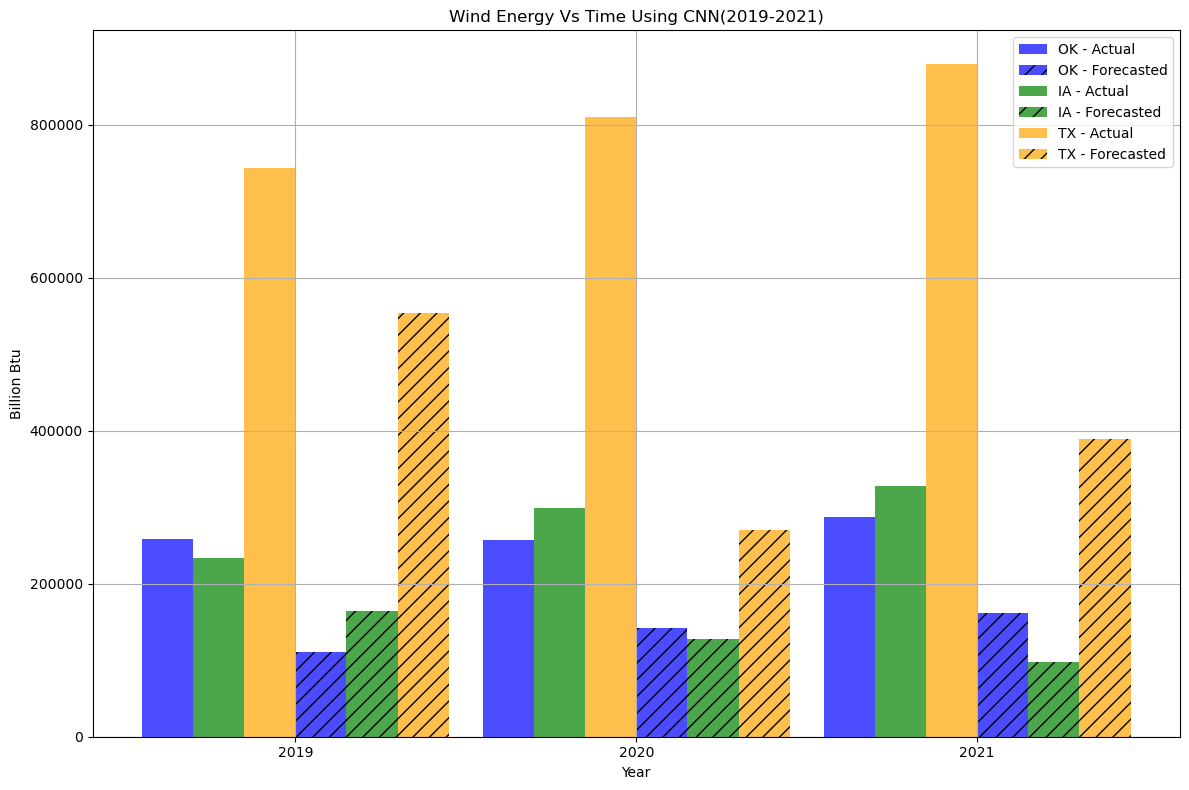

In [83]:
# list of state abbreviations to plot
state_abbreviations =  ['OK','IA','TX']

# Use iloc to get the required years (2019 to 2021) from the end
selected_years = Wind_T.iloc[-3:]
years_forecast = selected_years

# width of the bars
bar_width = 0.15 

# Define colors for each state
state_colors = {'OK': 'blue', 'IA': 'green', 'TX': 'orange'}

# Create the bar plot for the actual and forecasted values
plt.figure(figsize=(12, 8))

for i, state in enumerate(state_abbreviations):
    # Calculate the x positions for the bars, introducing an offset for each state
    x_positions_actual = np.arange(len(selected_years.index)) + i * bar_width
    x_positions_forecasted = np.arange(len(years_forecast)) + (len(state_abbreviations) + i) * bar_width

    # Use the color assigned to the state for both actual and forecasted bars
    plt.bar(x_positions_actual, selected_years[state], label=f"{state} - Actual", width=bar_width, color=state_colors[state], alpha=0.7)
    plt.bar(x_positions_forecasted, state_predictions_cnn[state].values(), bar_width,
            label=f"{state} - Forecasted", hatch='//', color=state_colors[state], alpha=0.7)

# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Wind Energy Vs Time Using CNN(2019-2021)')

# Add legend
plt.legend()

# Set x-axis ticks and labels
combined_years = np.arange(len(selected_years.index)) + (len(state_abbreviations) - 0.5) * bar_width
plt.xticks(combined_years, selected_years.index)  

# Add grid
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()


In [7]:
# Loop through each selected state
state_mse_dict = {}
state_rmse_dict = {}
state_forecasts_dict = {} 

for state in ['OK', 'IA', 'TX']:
    # Extract the data for the selected state
    data = Wind.loc[state].values

    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))

    # Create sequences for CNN
    sequence_length = 30
    sequences, targets = create_sequences(scaled_data, sequence_length)

    # Split data into training and testing sets
    train_size = int(len(sequences) * 0.8)
    x_train, y_train = sequences[:train_size], targets[:train_size]

    # Include data beyond 1969 for training
    x_train_full, y_train_full = sequences[:len(x_train)], targets[:len(y_train)]

    # Create and train a 1D CNN model
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error', sample_weight_mode="temporal")

    # Initialize sample weights with ones 
    sample_weights = np.ones(train_size)

    # Lists to store forecasts and actual values
    forecasts = []
    actual_values = []

    # Lists to store MSE and RMSE values
    mse_values = []
    rmse_values = []

    # Iterate through the forecast years
    current_sequence = x_train_full[-1]  # Start with the last sequence from the training data
    for year in range(train_size, len(scaled_data)):
        # Make a prediction for the next year
        forecast = model.predict(current_sequence.reshape(1, sequence_length, 1))

        # Update the model with the actual data for the current year
        actual_value = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence.reshape(1, sequence_length, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value)

        # Calculate the mean squared error between the forecast and actual value
        mse = mean_squared_error([actual_value], [forecast[0]])

        # Calculate the root mean squared error between the forecast and actual value
        rmse = np.sqrt(mse)

        # Append MSE and RMSE values to lists
        mse_values.append(mse)
        rmse_values.append(rmse)

        # Update sample weights based on prediction accuracy
        sample_weights = np.append(sample_weights, mse)  # Use MSE for sample weights

        # Re-train the model with updated sample weights
        model.fit(x_train_full, y_train_full, epochs=10, batch_size=1, sample_weight=sample_weights)

        # Update the current sequence
        current_sequence = np.append(current_sequence[1:], forecast[0])

        # If prediction accuracy is below the threshold, retrain and predict again
        if mse > accuracy_threshold:
            continue
        else:
            forecasts.append(forecast[0])
            actual_values.append(actual_value)

    # Inverse transform the forecasts and actual values to the original scale
    forecasts = scaler.inverse_transform(np.array(forecasts).reshape(-1, 1))
    actual_values = scaler.inverse_transform(np.array(actual_values).reshape(-1, 1))

    # Calculate the mean squared error (MSE) for the forecasts
    average_mse = np.mean(mse_values)

    # Calculate the root mean squared error (RMSE) for the forecasts
    average_rmse = np.mean(rmse_values)

    state_mse_dict[state] = average_mse
    state_rmse_dict[state] = average_rmse

    # Forecast for 2022 and 2023
    forecast_2022 = model.predict(current_sequence.reshape(1, sequence_length, 1))
    current_sequence = np.append(current_sequence[1:], forecast_2022[0])
    forecast_2023 = model.predict(current_sequence.reshape(1, sequence_length, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022 = scaler.inverse_transform(forecast_2022.reshape(-1, 1))[0][0]
    forecast_2023 = scaler.inverse_transform(forecast_2023.reshape(-1, 1))[0][0]
    state_forecasts_dict[state] = {'2022': forecast_2022, '2023': forecast_2023}

# Print MSE and RMSE for all states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_dict.items():
    print(f"MSE for {state} (CNN): {mse_value:.2f}")

print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_dict.items():
    print(f"RMSE for {state} (CNN): {rmse_value:.2f}")

# Print forecasts for all states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_dict.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

1/1 [==============================] - 0s 53ms/step
Epoch 1/10
26/26 [==============================] - 1s 3ms/step - loss: 0.0098
Epoch 2/10
26/26 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 3/10
26/26 [==============================] - 0s 3ms/step - loss: 6.8612e-04
Epoch 4/10
26/26 [==============================] - 0s 4ms/step - loss: 2.8555e-04
Epoch 5/10
26/26 [==============================] - 0s 3ms/step - loss: 5.1164e-04
Epoch 6/10
26/26 [==============================] - 0s 3ms/step - loss: 3.2908e-04
Epoch 7/10
26/26 [==============================] - 0s 3ms/step - loss: 3.3336e-04
Epoch 8/10
26/26 [==============================] - 0s 3ms/step - loss: 2.9368e-04
Epoch 9/10
26/26 [==============================] - 0s 4ms/step - loss: 2.6616e-04
Epoch 10/10
1/1 [==============================] - 0s 20ms/step
Epoch 1/10
27/27 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 2/10
27/27 [==============================] - 0s 3ms/step - 

44/44 [==============================] - 0s 3ms/step - loss: 3.4921e-05
Epoch 7/10
44/44 [==============================] - 0s 3ms/step - loss: 4.4587e-05
Epoch 8/10
44/44 [==============================] - 0s 3ms/step - loss: 3.7414e-05
Epoch 9/10
44/44 [==============================] - 0s 4ms/step - loss: 5.0345e-05
Epoch 10/10
1/1 [==============================] - 0s 17ms/step
Epoch 1/10
45/45 [==============================] - 0s 5ms/step - loss: 2.6875e-05
Epoch 2/10
45/45 [==============================] - 0s 3ms/step - loss: 5.7426e-05
Epoch 3/10
45/45 [==============================] - 0s 3ms/step - loss: 4.0950e-05
Epoch 4/10
45/45 [==============================] - 0s 4ms/step - loss: 5.0391e-05
Epoch 5/10
45/45 [==============================] - 0s 3ms/step - loss: 1.4302e-04
Epoch 6/10
45/45 [==============================] - 0s 4ms/step - loss: 8.0508e-05
Epoch 7/10
45/45 [==============================] - 0s 2ms/step - loss: 6.7429e-05
Epoch 8/10
45/45 [================

53/53 [==============================] - 0s 2ms/step - loss: 3.7426e-05
Epoch 10/10
1/1 [==============================] - 0s 33ms/step
Epoch 1/10
54/54 [==============================] - 0s 3ms/step - loss: 6.1620e-05
Epoch 2/10
54/54 [==============================] - 0s 3ms/step - loss: 1.3017e-04
Epoch 3/10
54/54 [==============================] - 0s 3ms/step - loss: 7.2660e-05
Epoch 4/10
54/54 [==============================] - 0s 3ms/step - loss: 9.6091e-05
Epoch 5/10
54/54 [==============================] - 0s 3ms/step - loss: 2.9170e-05
Epoch 6/10
54/54 [==============================] - 0s 3ms/step - loss: 8.7547e-05
Epoch 7/10
54/54 [==============================] - 0s 2ms/step - loss: 3.7211e-05
Epoch 8/10
54/54 [==============================] - 0s 2ms/step - loss: 1.1153e-04
Epoch 9/10
54/54 [==============================] - 0s 2ms/step - loss: 3.8102e-05
Epoch 10/10
1/1 [==============================] - 0s 29ms/step
Epoch 1/10
55/55 [==============================] - 0

35/35 [==============================] - 0s 2ms/step - loss: 5.3929e-05
Epoch 5/10
35/35 [==============================] - 0s 2ms/step - loss: 7.8530e-05
Epoch 6/10
35/35 [==============================] - 0s 2ms/step - loss: 6.8339e-05
Epoch 7/10
35/35 [==============================] - 0s 2ms/step - loss: 7.2031e-05
Epoch 8/10
35/35 [==============================] - 0s 2ms/step - loss: 7.4797e-05
Epoch 9/10
35/35 [==============================] - 0s 2ms/step - loss: 8.6572e-05
Epoch 10/10
1/1 [==============================] - 0s 16ms/step
Epoch 1/10
36/36 [==============================] - 0s 2ms/step - loss: 1.3578e-04
Epoch 2/10
36/36 [==============================] - 0s 2ms/step - loss: 5.1426e-05
Epoch 3/10
36/36 [==============================] - 0s 2ms/step - loss: 1.2607e-04
Epoch 4/10
36/36 [==============================] - 0s 2ms/step - loss: 2.5220e-04
Epoch 5/10
36/36 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 6/10
36/36 [====================

1/1 [==============================] - 0s 28ms/step
Epoch 1/10
54/54 [==============================] - 0s 3ms/step - loss: 5.4353e-05
Epoch 2/10
54/54 [==============================] - 0s 2ms/step - loss: 8.1167e-05
Epoch 3/10
54/54 [==============================] - 0s 2ms/step - loss: 6.5644e-05
Epoch 4/10
54/54 [==============================] - 0s 3ms/step - loss: 3.2522e-04
Epoch 5/10
54/54 [==============================] - 0s 3ms/step - loss: 8.2242e-05
Epoch 6/10
54/54 [==============================] - 0s 2ms/step - loss: 1.6623e-04
Epoch 7/10
54/54 [==============================] - 0s 2ms/step - loss: 9.0002e-05
Epoch 8/10
54/54 [==============================] - 0s 2ms/step - loss: 1.0581e-04
Epoch 9/10
54/54 [==============================] - 0s 2ms/step - loss: 4.4322e-05
Epoch 10/10
1/1 [==============================] - 0s 25ms/step
Epoch 1/10
55/55 [==============================] - 0s 2ms/step - loss: 3.7853e-05
Epoch 2/10
55/55 [==============================] - 0s

35/35 [==============================] - 0s 3ms/step - loss: 1.9530e-04
Epoch 5/10
35/35 [==============================] - 0s 3ms/step - loss: 2.8803e-04
Epoch 6/10
35/35 [==============================] - 0s 3ms/step - loss: 1.8176e-04
Epoch 7/10
35/35 [==============================] - 0s 2ms/step - loss: 4.1584e-04
Epoch 8/10
35/35 [==============================] - 0s 3ms/step - loss: 1.3563e-04
Epoch 9/10
35/35 [==============================] - 0s 3ms/step - loss: 1.2511e-04
Epoch 10/10
1/1 [==============================] - 0s 18ms/step
Epoch 1/10
36/36 [==============================] - 0s 2ms/step - loss: 1.3806e-04
Epoch 2/10
36/36 [==============================] - 0s 3ms/step - loss: 2.1174e-04
Epoch 3/10
36/36 [==============================] - 0s 3ms/step - loss: 1.0214e-04
Epoch 4/10
36/36 [==============================] - 0s 3ms/step - loss: 3.0910e-04
Epoch 5/10
36/36 [==============================] - 0s 2ms/step - loss: 4.9288e-04
Epoch 6/10
36/36 [================

1/1 [==============================] - 0s 17ms/step
Epoch 1/10
54/54 [==============================] - 0s 2ms/step - loss: 6.7850e-05
Epoch 2/10
54/54 [==============================] - 0s 3ms/step - loss: 8.8204e-05
Epoch 3/10
54/54 [==============================] - 0s 2ms/step - loss: 1.0704e-04
Epoch 4/10
54/54 [==============================] - 0s 2ms/step - loss: 8.8329e-05
Epoch 5/10
54/54 [==============================] - 0s 2ms/step - loss: 5.0228e-05
Epoch 6/10
54/54 [==============================] - 0s 2ms/step - loss: 4.2627e-05
Epoch 7/10
54/54 [==============================] - 0s 2ms/step - loss: 8.4372e-05
Epoch 8/10
54/54 [==============================] - 0s 2ms/step - loss: 8.2587e-05
Epoch 9/10
54/54 [==============================] - 0s 2ms/step - loss: 8.6909e-05
Epoch 10/10
1/1 [==============================] - 0s 19ms/step
Epoch 1/10
55/55 [==============================] - 0s 2ms/step - loss: 1.3904e-04
Epoch 2/10
55/55 [==============================] - 0s

## Machine Learning Forecasting

### ARIMA

In [17]:
# Function to perform ARIMA forecast
def arima_forecast(state_data, state_name, order=(5, 1, 0), forecast_steps=2):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(state_data.reshape(-1, 1))
    
    train_size = int(len(scaled_data) * 0.8)
    train, test = scaled_data[:train_size], scaled_data[train_size:]
    
    model = ARIMA(train, order=order)
    fit_model = model.fit()
    
    forecast_values_arima = fit_model.forecast(steps=len(scaled_data) - train_size + forecast_steps)
    forecast_values_arima = scaler.inverse_transform(forecast_values_arima.reshape(-1, 1))
    
    mse_arima = mean_squared_error(state_data[train_size:], forecast_values_arima[:len(state_data) - train_size])
    rmse_arima = np.sqrt(mse_arima)
    
    forecast_years_arima = forecast_values_arima[:len(state_data)]
    
    return mse_arima, rmse_arima, forecast_years_arima

# Selected states
selected_states = ['OK','IA','TX']

# Dictionaries to store results
mse_arima_dict = {}
rmse_arima_dict = {}
forecast_years_arima_dict = {}
accuracy_arima_dict = {}

# Loop through each selected state for ARIMA
for state in selected_states:
    state_data = Wind.loc[state].values
    mse_arima, rmse_arima, forecast_years_arima = arima_forecast(state_data, state, order=(5, 1, 0), forecast_steps=2)
    
    mse_arima_dict[state] = mse_arima
    rmse_arima_dict[state] = rmse_arima
    forecast_years_arima_dict[state] = forecast_years_arima
    
    # Calculate accuracy for each year
    actual_data = state_data[-3:]
    forecasted_data = forecast_years_arima[:3]
    
    accuracies = 100 - np.abs((forecasted_data - actual_data) / actual_data) * 100
    
    accuracy_arima_dict[state] = {
        '2019': accuracies[0][0],
        '2020': accuracies[1][0],
        '2021': accuracies[2][0]
    }
    
    # Print the values for each year
    print(f"\n{state} - Actual Values:")
    print(f"2019: {actual_data[0]:.2f}, 2020: {actual_data[1]:.2f}, 2021: {actual_data[2]:.2f}")

    print(f"{state} - Forecasted Values:")
    print(f"2019: {forecasted_data[0][0]:.2f}, 2020: {forecasted_data[1][0]:.2f}, 2021: {forecasted_data[2][0]:.2f}")

    # Print forecast values for 2022 and 2023
    print(f"{state} - Forecasted Values for 2022 and 2023:")
    for year, forecast_value in zip(range(2022, 2024), forecast_years_arima[3:]):
        print(f"{year}: {forecast_value[0]:.2f}")

    # Print the accuracy for each year
    print(f"Accuracy for {state} (ARIMA) - 2019: {accuracy_arima_dict[state]['2019']:.2f}%")
    print(f"Accuracy for {state} (ARIMA) - 2020: {accuracy_arima_dict[state]['2020']:.2f}%")
    print(f"Accuracy for {state} (ARIMA) - 2021: {accuracy_arima_dict[state]['2021']:.2f}")
    print(f"Mean Squared Error (MSE) for {state} (ARIMA): {mse_arima:.2f}")
    print(f"Root Mean Squared Error (RMSE) for {state} (ARIMA): {rmse_arima:.2f}\n")



OK - Actual Values:
2019: 258143.00, 2020: 257899.00, 2021: 287787.00
OK - Forecasted Values:
2019: 23237.37, 2020: 23237.75, 2021: 23237.84
OK - Forecasted Values for 2022 and 2023:
2022: 23237.92
2023: 23237.92
Accuracy for OK (ARIMA) - 2019: 9.00%
Accuracy for OK (ARIMA) - 2020: 9.00%
Accuracy for OK (ARIMA) - 2021: 9.00
Mean Squared Error (MSE) for OK (ARIMA): 25056046182.90
Root Mean Squared Error (RMSE) for OK (ARIMA): 158291.02


IA - Actual Values:
2019: 234088.00, 2020: 299676.00, 2021: 328097.00
IA - Forecasted Values:
2019: 51267.49, 2020: 60381.45, 2021: 75492.32
IA - Forecasted Values for 2022 and 2023:
2022: 90142.88
2023: 100869.71
Accuracy for IA (ARIMA) - 2019: 21.90%
Accuracy for IA (ARIMA) - 2020: 25.79%
Accuracy for IA (ARIMA) - 2021: 32.25
Mean Squared Error (MSE) for IA (ARIMA): 3164303588.41
Root Mean Squared Error (RMSE) for IA (ARIMA): 56252.14


TX - Actual Values:
2019: 744138.00, 2020: 810430.00, 2021: 879750.00
TX - Forecasted Values:
2019: 216829.08, 2020

In [14]:
# Function to perform ARIMA forecast
def arima_forecast(state_data, state_name, order=(5, 1, 0), forecast_steps=2):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(state_data.reshape(-1, 1))
    # split the training data
    train_size = int(len(scaled_data) * 0.8)
    train, test = scaled_data[:train_size], scaled_data[train_size:]
    # model 
    model = ARIMA(train, order=order)
    fit_model = model.fit()
    # forecast value
    forecast_values_arima = fit_model.forecast(steps=len(scaled_data) - train_size + forecast_steps)
    forecast_values_arima = scaler.inverse_transform(forecast_values_arima.reshape(-1, 1))
    # mse and rmse 
    mse_arima = mean_squared_error(state_data[train_size:], forecast_values_arima[:len(state_data) - train_size])
    rmse_arima = np.sqrt(mse_arima)
    # Forecasting 
    forecast_years_arima = forecast_values_arima[:len(state_data)]
    return mse_arima, rmse_arima, forecast_years_arima

# Selected states
selected_states = ['OK','IA','TX']

# Dictionaries to store results
mse_arima_dict = {}
rmse_arima_dict = {}
forecast_years_arima_dict = {}
accuracy_arima_dict = {}

# Loop through each selected state for ARIMA
for state in selected_states:
    state_data = Wind.loc[state].values
    mse_arima, rmse_arima, forecast_years_arima = arima_forecast(state_data, state, order=(5, 1, 0), forecast_steps=2)
    mse_arima_dict[state] = mse_arima
    rmse_arima_dict[state] = rmse_arima
    forecast_years_arima_dict[state] = forecast_years_arima
    
    # Calculate accuracy for each year
    actual_data = state_data[-3:]
    forecasted_data = forecast_years_arima[:3]
    accuracies = np.abs((forecasted_data - actual_data) / actual_data) * 100
    # arima accuracy dictanary 
    accuracy_arima_dict[state] = {
        '2019': accuracies[0][0],
        '2020': accuracies[1][0],
        '2021': accuracies[2][0]
    }

# Print the actual and forecasted values for each year and accuracy for each state
for state in selected_states:
    print(f"Accuracy for {state} (ARIMA) - 2019: {accuracy_arima_dict[state]['2019']:.2f}%")
    print(f"Accuracy for {state} (ARIMA) - 2020: {accuracy_arima_dict[state]['2020']:.2f}%")
    print(f"Accuracy for {state} (ARIMA) - 2021: {accuracy_arima_dict[state]['2021']:.2f}%")



# Print the forecasted values for 2022 and 2023 for all states
print("\nForecasted Values for 2022 and 2023 (ARIMA):")
for year in range(2022, 2024):
    print(f"Forecasts for {year}:")
    for state in selected_states:
        forecast_value = forecast_years_arima_dict[state][year - 2019][0]
        print(f"{state}: {forecast_value:.2f}")

# Print MSE for all states
print("\nMean Squared Error (MSE) for All states:")
for state, mse_value in mse_arima_dict.items():
    print(f"MSE for {state} (ARIMA): {mse_value:.2f}")

# Print RMSE for all states
print("\nRoot Mean Squared Error (RMSE) for All states:")
for state, rmse_value in rmse_arima_dict.items():
    print(f"RMSE for {state} (ARIMA): {rmse_value:.2f}")

Accuracy for OK (ARIMA) - 2019: 91.00%
Accuracy for OK (ARIMA) - 2020: 91.00%
Accuracy for OK (ARIMA) - 2021: 91.00%
Accuracy for IA (ARIMA) - 2019: 78.10%
Accuracy for IA (ARIMA) - 2020: 74.21%
Accuracy for IA (ARIMA) - 2021: 67.75%
Accuracy for TX (ARIMA) - 2019: 70.86%
Accuracy for TX (ARIMA) - 2020: 58.91%
Accuracy for TX (ARIMA) - 2021: 48.33%

Forecasted Values for 2022 and 2023 (ARIMA):
Forecasts for 2022:
OK: 23237.92
IA: 90142.88
TX: 492463.79
Forecasts for 2023:
OK: 23237.92
IA: 100869.71
TX: 584340.24

Mean Squared Error (MSE) for All states:
MSE for OK (ARIMA): 25056046182.90
MSE for IA (ARIMA): 3164303588.41
MSE for TX (ARIMA): 129190301559.98

Root Mean Squared Error (RMSE) for All states:
RMSE for OK (ARIMA): 158291.02
RMSE for IA (ARIMA): 56252.14
RMSE for TX (ARIMA): 359430.52


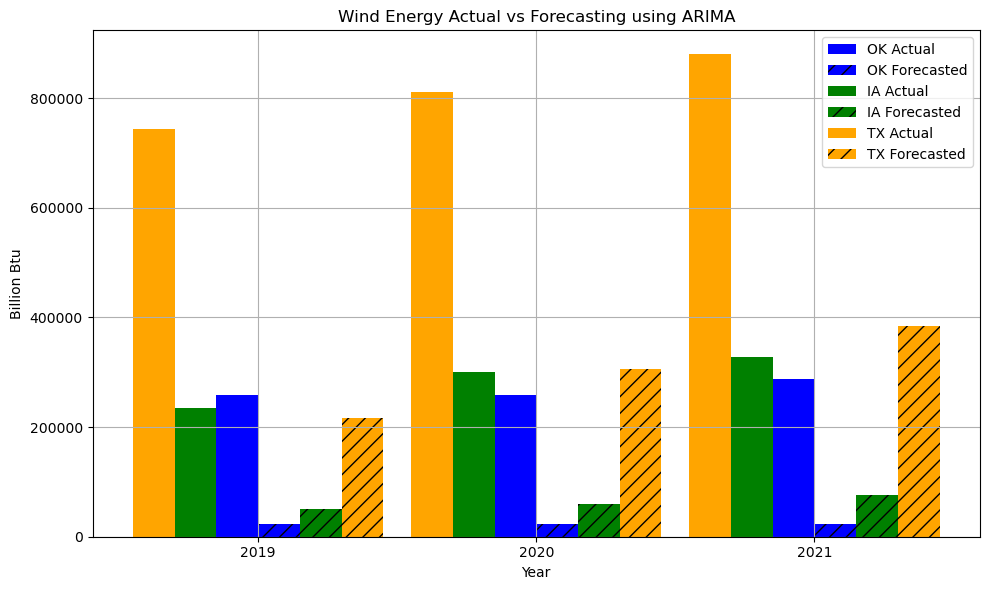

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Define colors for each state
state_colors = {'OK': 'blue', 'IA': 'green', 'TX': 'orange'}

# Create a new figure
plt.figure(figsize=(10, 6))

# Define the width of the bars and the space between bar groups
bar_width = 0.15  
space = np.arange(len(range(2019, 2022)))

# Loop through each selected state
for i, state in enumerate(selected_states):
    # Extract actual and forecasted data
    actual_data = Wind.loc[state].values[-3:]
    forecasted_data = np.array(forecast_years_arima_dict[state][:3]).flatten() 

    # Generate x values (years)
    years = range(2019, 2022)

    # Plot actual data with custom color on the left side
    plt.bar(space - bar_width/2 - i*bar_width, actual_data, bar_width, label=f'{state} Actual', color=state_colors[state])

    # Plot forecasted data with hatch pattern and custom color on the right side
    plt.bar(space + bar_width/2 + i*bar_width, forecasted_data, bar_width, label=f'{state} Forecasted', color=state_colors[state], hatch='//')

# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Wind Energy Actual vs Forecasting using ARIMA')

# Add xticks
plt.xticks(space, years)

# Add a legend
plt.legend()

# Add grid
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()